<a href="https://colab.research.google.com/github/benintw/Pytorch_self_learning_notes/blob/main/Pytorch_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important Notes:

### Loss
- loss.item() contains the loss of entire mini-batch, but divided by the batch size. 
- loss.item() is the "avg_mini_batch_loss".
- In general the PyTorch APIs return avg loss by default: "The losses are averaged across observations for each minibatch."
- That's why loss.item() is multiplied with batch size, given by inputs.size(0), while calculating running_loss.
- ie. running_loss += loss.item() * inputs.size(0)
- Each epoch should have its own running_loss






# Matplotlib Basics

https://steam.oxxostudio.tw/category/python/example/matplotlib-figure-axes.html

https://pandas.pydata.org/docs/user_guide/index.html#user-guide

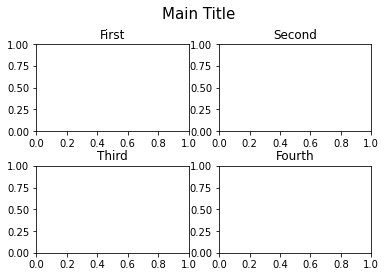

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

# need to add spacing bewteen 1st and 2nd row
# add a margin between the main title and subplots
fig.subplots_adjust(hspace=0.4, top=0.85)

# add the main title
fig.suptitle("Main Title", fontsize=15)

# add the subplots
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# add the text for each subplot
ax1.title.set_text("First")
ax2.title.set_text("Second")
ax3.title.set_text("Third")
ax4.title.set_text("Fourth")

plt.show()

# link:
> https://ithelp.ithome.com.tw/articles/10281400

# Easy Regression (with Numpy)

In [ ]:
import numpy as np

# f = w * x 
# f = 2 * x , where we set w = 2
x = np.array([1,2,3,4,5,6], dtype= np.float32)
y = np.array([2,4,6,8,10,12],dtype = np.float32)

# init weight
w = 0.0

# model prediction
def forward(x):
    return w * x

def loss(y, y_pred):
    return ((y_pred - y) ** 2).mean()

def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred - y).mean()


print(f'Prediction before training: f(5) = {forward(5):.2f}')

# training 
learning_rate = 1e-2
n_iters = 50

for epoch in range(n_iters):
    # predict
    y_pred = forward(x)

    # loss
    l = loss(y,y_pred)

    # calculate gradients
    dw = gradient(x, y, y_pred)

    # update weights
    w -= learning_rate * dw

    if epoch % 10 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')

print(f"Prediction after training: f(5) = {forward(5):.3f}")
print(f'')

Prediction before training: f(5) = 0.00
epoch 1: w = 3.640, loss = 60.66666794
epoch 11: w = 2.225, loss = 1.14611185
epoch 21: w = 2.031, loss = 0.02165227
epoch 31: w = 2.004, loss = 0.00040906
epoch 41: w = 2.001, loss = 0.00000773
Prediction after training: f(5) = 10.000



# Logistic Regression (sklearn - Iris data)

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
import pandas as pd
import numpy as np

# feature = pd.DataFrame(iris.data, columns = iris.feature_names)
# target = pd.DataFrame(iris.target, columns = iris['target'])
# iris_data = pd.concat([feature, target], axis = 1)
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.loc[:, "target"] = iris.target

# keep only sepal length in cm, sepal width in cm, and target
iris_data = iris_df[['sepal length (cm)', 'sepal width (cm)', 'target']]

# keep only Iris-setosa and Iris-versicolour classes
iris_data = iris_data[iris_data.target <= 1]

print(iris_data.head(5))

   sepal length (cm)  sepal width (cm)  target
0                5.1               3.5       0
1                4.9               3.0       0
2                4.7               3.2       0
3                4.6               3.1       0
4                5.0               3.6       0


### train_test_split with sklearn

In [ ]:
from sklearn.model_selection import train_test_split

train_feature, test_feature, train_target, test_target = train_test_split(
    iris_data[["sepal length (cm)", "sepal width (cm)"]], iris_data[["target"]],
    test_size = 0.3, random_state = 4
)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_feature = sc.fit_transform(train_feature)
test_feature = sc.fit_transform(test_feature)
train_target = np.array(train_target)
test_target = np.array(test_target)

# print(train_feature, test_feature)

In [ ]:
# 1) Model construction
# f = w*x + b , sigmoid at the end

class LogisticRegression():
    def __init__(self):
        super().__init__()

    def linear (self, x, w, b):
        return np.dot(x,w) + b
    
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def forward(self, x, w, b):
        y_pred = self.sigmoid(self.linear(x, w, b)).reshape(-1,1)
        return y_pred

model = LogisticRegression()

In [ ]:
# 2) loss and optimizer
learning_rate = 1e-2

# loss function : cross entropy
class BinaryCrossEntropy():
    def __init__(self):
        super().__init__()
    
    def cross_entropy(self, y_pred, target):
        x = target * np.log(y_pred) + (1-target) * np.log(1-y_pred)
        
        return -(np.mean(x))

    def forward(self, y_pred, target):
        return self.cross_entropy(y_pred, target)

# Optimizer : Gradient Descent
class GradientDescent():
    def __init__(self, lr = 0.1):
        super().__init__()
        self.lr = lr
    
    def forward(self, w, b, y_pred, target, data):
        w = w - self.lr * np.mean(data * (y_pred - target), axis = 0)
        b = b - self.lr * np.mean((y_pred - target), axis = 0)

        return w, b 

criterion = BinaryCrossEntropy()
optimizer = GradientDescent(lr = learning_rate)


In [ ]:
# training
w = np.array([0,0])
b = np.array([0])
num_epochs = 100

for epoch in range(num_epochs):
    
    for i, data in enumerate(train_feature):
        # forward pass and calculate loss
        y_pred = model.forward(data, w, b)
        loss = criterion.forward(y_pred, train_target[i])

        # update parameters
        w, b = optimizer.forward(w, b, y_pred, train_target[i], data)

    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch+1}: loss = {loss}, w = {w}, b = {b}')


epoch 10: loss = 0.07657651925366436, w = [ 1.22439738 -1.2099661 ], b = [0.12480947]
epoch 20: loss = 0.028666559040120547, w = [ 1.70569522 -1.70950936], b = [0.20221124]
epoch 30: loss = 0.015103912462249488, w = [ 2.0160193 -2.0372316], b = [0.26181321]
epoch 40: loss = 0.009341936187255154, w = [ 2.24947126 -2.28423267], b = [0.31104536]
epoch 50: loss = 0.006347331322135034, w = [ 2.43869645 -2.48365698], b = [0.35344936]
epoch 60: loss = 0.004588814709659379, w = [ 2.59895081 -2.65150745], b = [0.39099147]
epoch 70: loss = 0.0034674258456523894, w = [ 2.73863782 -2.79679149], b = [0.424875]
epoch 80: loss = 0.002708407672822415, w = [ 2.86290087 -2.92510158], b = [0.45589048]
epoch 90: loss = 0.002170905368933817, w = [ 2.97512826 -3.04015707], b = [0.4845862]
epoch 100: loss = 0.0017765096124344815, w = [ 3.0776768  -3.14456113], b = [0.51135898]


In [ ]:
# checking testing accuracy
y_pred = model.forward(test_feature, w, b)
y_pred_cls = y_pred.round()
acc = np.equal(y_pred_cls, test_target).sum() / float(test_target.shape[0])
print(f'accuracy = {acc:.4f}')

accuracy = 0.9667


# Linear Regression (Pytorch)

epoch: 10, loss = 5653.1938
epoch: 20, loss = 3889.2588
epoch: 30, loss = 2708.8586
epoch: 40, loss = 1918.7887
epoch: 50, loss = 1389.8662
epoch: 60, loss = 1035.7004
epoch: 70, loss = 798.5018
epoch: 80, loss = 639.6093
epoch: 90, loss = 533.1492
epoch: 100, loss = 461.8058
epoch: 110, loss = 413.9854
epoch: 120, loss = 381.9259
epoch: 130, loss = 360.4285
epoch: 140, loss = 346.0104
epoch: 150, loss = 336.3386
epoch: 160, loss = 329.8493
epoch: 170, loss = 325.4945
epoch: 180, loss = 322.5714
epoch: 190, loss = 320.6092
epoch: 200, loss = 319.2915


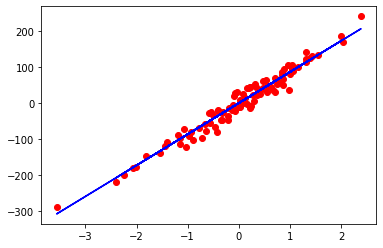

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.optim import optimizer
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data
feature_numpy, target_numpy = datasets.make_regression(
    n_samples = 100, n_features = 1, noise = 20, random_state = 1234
)

feature = torch.from_numpy(feature_numpy.astype(np.float32))
target = torch.from_numpy(target_numpy.astype(np.float32))

target = target.view(target.shape[0],1)
n_samples, n_features = feature.shape

# 1) model
class LinearRegression(nn.Module):

    def __init__(self, input_dim, output_dim):
        super().__init__()

        # define layers
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):

        return self.linear(x)

# input_dim = n_feature, output_dim = 1    
model = LinearRegression(n_features, 1)

# 2) loss and optimizer
learning_rate = 1e-2
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# 3) define training loop
epochs = 200

for epoch in range(epochs):

    # forward pass 
    y_pred = model(feature)

    # calculate loss
    loss = criterion(y_pred, target) # average loss 

    # backward pass
    loss.backward()

    # update
    optimizer.step()

    # zero_grad()
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}') # loss.item() mini_batch average loss

# show in image
predicted = model(feature).detach().numpy()
plt.plot(feature_numpy, target_numpy, 'ro')
plt.plot(feature_numpy, predicted, 'b')
plt.show()


In [ ]:
print(model.linear.weight)
print(model.linear.bias)
print(model.parameters)

Parameter containing:
tensor([[86.3983]], requires_grad=True)
Parameter containing:
tensor([0.6473], requires_grad=True)
<bound method Module.parameters of LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)>


# Logistic Regression (Pytorch - Iris Data )

In [ ]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

# 0) data import and preprocessing
from sklearn import datasets

iris = datasets.load_iris()
# print(iris.DESCR)

# use pandas as dataframe and merge features and targetsf
feature = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.DataFrame(iris.target, columns=['target'])
iris_data = pd.concat([feature, target], axis=1)

# keep only sepal length in cm, sepal width in cm and target
iris_data = iris_data[['sepal length (cm)', 'sepal width (cm)', 'target']]

# keep only Iris-Setosa and Iris-Versicolour classes
iris_data = iris_data[iris_data.target <= 1]
iris_data.head(5)

feature = iris_data[['sepal length (cm)', 'sepal width (cm)']]
target = iris_data[['target']]

n_samples, n_features = feature.shape

# split training data and testing data
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(
    feature, target, test_size=0.3, random_state=4
)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
feature_train = sc.fit_transform(feature_train)
feature_test = sc.fit_transform(feature_test)
target_train = np.array(target_train)
target_test = np.array(target_test)

# change data to torch
feature_train = torch.from_numpy(feature_train.astype(np.float32))
feature_test = torch.from_numpy(feature_test.astype(np.float32))
target_train = torch.from_numpy(target_train.astype(np.float32))
target_test = torch.from_numpy(target_test.astype(np.float32))

# 1) model build
class LogisticRegression(nn.Module):

    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()

        # define layers
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))

        return y_predicted

model = LogisticRegression(n_features)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
epochs = 100
for epoch in range(epochs):
    # forward pass and loss
    y_predicted = model(feature_train)
    loss = criterion(y_predicted, target_train)

    # backward pass
    loss.backward()

    # optimizer
    optimizer.step()

    # init optimizer
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f'epoch {epoch + 1}: loss = {loss:.8f}')

# checking testing accuracy
with torch.no_grad():
    y_predicted = model(feature_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(target_test).sum() / float(target_test.shape[0])
    print(f'accuracy = {acc: .4f}')

epoch 10: loss = 0.83595002
epoch 20: loss = 0.80454981
epoch 30: loss = 0.77476645
epoch 40: loss = 0.74652970
epoch 50: loss = 0.71976942
epoch 60: loss = 0.69441509
epoch 70: loss = 0.67039740
epoch 80: loss = 0.64764792
epoch 90: loss = 0.62609994
epoch 100: loss = 0.60568881
accuracy =  0.6000


In [ ]:
model.linear

Linear(in_features=2, out_features=1, bias=True)

In [ ]:
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[ 0.6622, -0.2170]], requires_grad=True)
Parameter containing:
tensor([-0.0757], requires_grad=True)


# Dataset & DataLoader (Iris Example)

https://medium.com/analytics-vidhya/creating-a-custom-dataset-and-dataloader-in-pytorch-76f210a1df5d

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

epoch 1/10, step 19/19, mini batch mean loss = 0.5422
epoch 2/10, step 19/19, mini batch mean loss = 0.5834
epoch 3/10, step 19/19, mini batch mean loss = 0.4760
epoch 4/10, step 19/19, mini batch mean loss = 0.4886
epoch 5/10, step 19/19, mini batch mean loss = 0.3746
epoch 6/10, step 19/19, mini batch mean loss = 0.3809
epoch 7/10, step 19/19, mini batch mean loss = 0.2842
epoch 8/10, step 19/19, mini batch mean loss = 0.2586
epoch 9/10, step 19/19, mini batch mean loss = 0.2383
epoch 10/10, step 19/19, mini batch mean loss = 0.2843


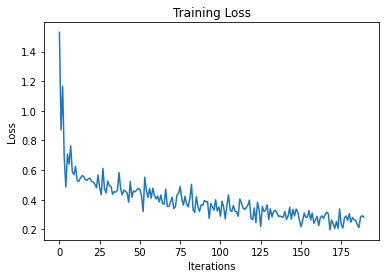

accuracy : 100.0


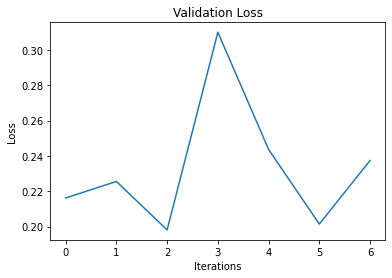

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# base data information and network data
input_size = 4

# Hyper-parameters
learning_rate = 1e-2
num_epochs = 10
batch_size = 4

# 0) data import and set as pytorch dataset
class IrisDataset(Dataset):

    # data loading
    def __init__(self):
        iris = datasets.load_iris()
        feature = pd.DataFrame(iris.data, columns=iris.feature_names)
        target = pd.DataFrame(iris.target, columns=['target'])
        iris_data = pd.concat([target, feature], axis=1)
        # keep only Iris-Setosa and Iris-Versicolour classes
        iris_data = iris_data[iris_data.target <= 1]
        self.x = torch.from_numpy(np.array(iris_data)[:, 1:])
        self.y = torch.from_numpy(np.array(iris_data)[:, [0]])
        self.n_samples = self.x.shape[0]

    # working for indexing
    def __getitem__(self, index):
        
        return self.x[index], self.y[index]

    # return the length of our dataset
    def __len__(self):

        return self.n_samples

dataset = IrisDataset()

# Create data splitter
def dataSplit(dataset, val_split = 0.25, shuffle = False, random_seed = 0):

    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    split = int(np.floor(val_split * dataset_size))

    if shuffle:
        np.random.seed(random_seed)
        np.random.shuffle(indices)
    
    train_indices, val_indices = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_indices)
    valid_sampler = SubsetRandomSampler(val_indices)

    return train_sampler, valid_sampler

# base split parameters
val_split = 0.25
shuffle_dataset = True
random_seed = 42

train_sampler, valid_sampler = dataSplit(dataset = dataset, val_split = val_split, shuffle = shuffle_dataset, 
              random_seed = random_seed)

train_loader = DataLoader(dataset, batch_size = batch_size, sampler = train_sampler)
valid_loader = DataLoader(dataset, batch_size = batch_size, sampler = valid_sampler)

# 1) model building
class LogisticRegression(nn.Module):

    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()

        # define layers
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))

        return y_pred

model = LogisticRegression(input_size)


# 2) Loss and Optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# 3) Training loop
# zero_grad -> forward -> calculate loss -> backward() -> optimizer.step()
n_total_steps = len(train_loader)

train_losses = []

for epoch in range(num_epochs):
    for i, (datas, labels) in enumerate(train_loader):
        
        # 1. init optimizer
        optimizer.zero_grad()

        # 2. forward
        outputs = model(datas.float())
        
        # 3. calculate loss
        loss = criterion(outputs.float(), labels.float())
        
        # 4. backpropagate
        loss.backward()

        # 5. optimize
        optimizer.step()

        train_losses.append(loss.item())

        if (i+1) % 19 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, mini batch mean loss = {loss.item():.4f}')

plt.title("Training Loss")
plt.plot(train_losses, label = 'train')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

# 4) Testing
valid_losses = []
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for datas, labels in valid_loader:
        outputs = model(datas.float())
        
        # to graph loss later
        loss = criterion(outputs.float(), labels.float())
        valid_losses.append(loss.item()) # loss.item() is mean mini batch loss
        
        outputs_cls = outputs.round()
        n_samples += labels.shape[0]
        n_correct += (outputs_cls == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'accuracy : {acc}')

plt.title("Validation Loss")
plt.plot(valid_losses, label = 'validation')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

# How to Import Data from Other places
> not from torchvision

In [ ]:
# Importing MNIST data from .csv files
class MNISTDataset(Dataset):

    # data loading
    def __init__(self, path, transform = None):
        # skiprow, skip the first row in cvs because its the headers
        xy = np.loadtxt(path, delimiter = ",", dtype = np.float32, skiprows =1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]]).flatten().astype(np.long)
        self.n_samples = xy.shape[0]
        self.transform = transform

    def __getitem__(self, idx):
        sample = self.x[idx], self.y[idx]

        if self.transform:
            sample = self.transform(sample)
        
        return sample

    def __len__(self):
        return self.n_samples

# write another Transform class to convert data structure
class ToImage():
    def __call__(self, sample):
        inputs, targets = sample
        return inputs.view(28, 28).unsqueeze(0), targets

'''Path of your .cvs files'''
train_path = './data/train.csv'
test_path = './data/train.csv'


train_dataset = MNISTDataset(train_path, transform = ToImage())
test_dataset = MNISTDataset(test_path, transform = ToImage())

train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)


OSError: ignored

# Dataset: Image Dataset

Refer to my Kaggle notebook [Anime Face Dataset](https://www.kaggle.com/benintw/anime-face-dataset/edit)

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision


dataroot = '/kaggle/input/animefacedataset'
BATCH_SIZE = 64 


### 1. Load Image Data with ImageFolder
dataset_anime = datasets.ImageFolder(root=dataroot,
                    transform=transforms.Compose([
                    transforms.Resize(image_size),
                    transforms.CenterCrop(image_size),
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                ]))

### 2. Examining Dataset
img, label = dataset_anime[0]
print(img)
print(img.shape)
print(label)


### 3. DataLoader
train_loader = DataLoader(dataset=dataset_anime,
                         batch_size=BATCH_SIZE,
                         shuffle=True)

### 4. Examine DataLoader
print(len(train_loader)) # 63565 / 64
print(len(dataset_anime)) # 63565
sample_data = next(iter(train_loader))
imgs, _ = sample_data
print(imgs[:3])

### 5. Display images
def show_dataset_imgs(img):
    """
    A function to display the loaded dataset images
    """
    img = img / 2 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()


show_dataset_imgs(torchvision.utils.make_grid(imgs))



# Pytorch CNN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper-parameters
num_epochs = 4
batch_size = 10
learning_rate = 1e-3

# 0) data importing 


# MNIST using torchvision
train_dataset = torchvision.datasets.MNIST(root = './data', train = True,
                    transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root = './data', train = False,
                    transform = transforms.ToTensor(), download = False)

train_loader = DataLoader(dataset = train_dataset, batch_size = batch_size, 
                          shuffle = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = batch_size, 
                         shuffle = True)


# 1) Model build
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        # image shape: 1*28*28, where 1 is one color channel
        # 28*28 is image size
        
        # input shape = 1 * 28 * 28
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size =5)
        # output shape = 3 * 24 * 24

        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        # output shape = 3 * 12 * 12

        # input shape = 3 * 12 * 12
        self.conv2 = nn.Conv2d(in_channels = 3, out_channels = 9, kernel_size = 5)
        # output shape = 9 * 8 * 8

        # add another max pooling so output shape = 9 * 4 * 4

        self.fc1 = nn.Linear(9*4*4, 100)
        self.fc2 = nn.Linear(100, 50)

        # last fully connected layer output should be same as classes
        self.fc3 = nn.Linear(50, 10)

    def forward(self, x):
        # first conv
        x = self.pool(F.relu(self.conv1(x)))

        # second conv
        x = self.pool(F.relu(self.conv2(x)))

        # flatten all dimensions except batch
        x = torch.flatten(x, 1)

        # fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x


def plot_training_curve(batch_size=batch_size, lr=learning_rate):
    
    model = ConvNet().to(device)

    # 2) loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

    iters = []
    losses = []

    # 3) Training loop
    n_total_steps = len(train_loader)

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)

            # init optimizer
            optimizer.step()

            # forward
            outputs = model(images)
            
            # loss
            loss = criterion(outputs, labels)

            # backward()
            loss.backward()

            # update
            optimizer.step()

            iters.append(i)
            losses.append(float(loss)/batch_size)

            if (i + 1) % 1000 == 0:
                print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, training_loss = {loss.item():.4f}')

        # Plotting
        plt.plot(iters, losses)
        plt.title(f"Training Curve (batch_size={batch_size}, lr={learning_rate})")
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.show()

    print("Finish Training")

# plot_training_curve(batch_size=32, lr=learning_rate)


model = ConvNet().to(device)

# 2) loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# 3) Training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # init optimizer
        optimizer.step()

        # forward
        outputs = model(images)
        
        # loss
        loss = criterion(outputs, labels)

        # backward()
        loss.backward()

        # update
        optimizer.step()

        if (i + 1) % 1000 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, training_loss = {loss.item():.4f}')

print("Finish Training")



# 4) Testing 
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)

        # max returns (value, index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
    
    acc = 100.0 * n_correct / n_samples 
    print(f'Accuracy : {acc}')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {i}: {acc}')




epoch 1/4, step 1000/6000, training_loss = 2.4043
epoch 1/4, step 2000/6000, training_loss = 2.7428
epoch 1/4, step 3000/6000, training_loss = 2.6833
epoch 1/4, step 4000/6000, training_loss = 3.0717
epoch 1/4, step 5000/6000, training_loss = 3.6324
epoch 1/4, step 6000/6000, training_loss = 2.8021
epoch 2/4, step 1000/6000, training_loss = 2.9363
epoch 2/4, step 2000/6000, training_loss = 2.7305
epoch 2/4, step 3000/6000, training_loss = 3.0258
epoch 2/4, step 4000/6000, training_loss = 2.2867
epoch 2/4, step 5000/6000, training_loss = 2.8540
epoch 2/4, step 6000/6000, training_loss = 2.5986
epoch 3/4, step 1000/6000, training_loss = 3.7678
epoch 3/4, step 2000/6000, training_loss = 3.3409
epoch 3/4, step 3000/6000, training_loss = 1.6344
epoch 3/4, step 4000/6000, training_loss = 5.1514
epoch 3/4, step 5000/6000, training_loss = 5.7191
epoch 3/4, step 6000/6000, training_loss = 3.9695
epoch 4/4, step 1000/6000, training_loss = 3.7044
epoch 4/4, step 2000/6000, training_loss = 5.1478


# MNIST Example (nn.BCEWithLogitsLoss()) with Plotting

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

torch.manual_seed(1) # set the random seed

In [ ]:
# load the data
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

print(len(mnist_train))

mnist_train = list(mnist_train)[:2000]
img, label = mnist_train[0]
print(img.shape)


60000
torch.Size([1, 28, 28])


In [ ]:
class Pigeon(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=28*28, out_features=30)
        self.layer2 = nn.Linear(in_features=30, out_features=1)
    def forward(self, img):
        flattened = img.view(-1, 28*28)
        x = self.layer1(flattened)
        x = F.relu(x)
        x = self.layer2(x)
        return x

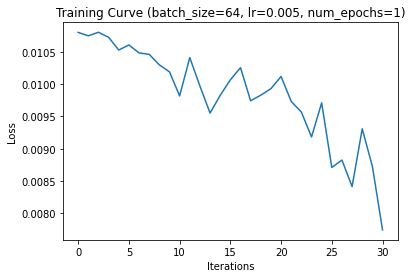

Final loss : 0.007742959074676037
Total Number of Iterations : 31


In [ ]:
def plot_training_curve(batch_size=1, lr=0.005, num_epochs=4): 
    """
    Plots the training curve on one epoch of training of the
    Pigeon network trained using the first 1024 images in
    the MNIST dataset.
    """

    pigeon = Pigeon()
    # dataloader
    train_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

    # Data info
    train_loader_iter = iter(train_loader)
    imgs, labels = next(train_loader_iter)
    # print(f"imgs.shape : {imgs.shape}")
    # print(labels)
    # print(f"labels.shape : {labels.shape}")
    

    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(pigeon.parameters(), lr=lr, momentum=0.9)

    iters  = []
    losses = []

    n = 0
    for epoch in range(num_epochs):

        # training
        # for n, (imgs, labels) in enumerate(train_loader):
        for imgs, labels in iter(train_loader):
            actual = (labels < 3).reshape([batch_size, 1]).type(torch.FloatTensor)
            out = pigeon(imgs)
            loss = criterion(out, actual) # compute the total loss
            loss.backward()               # compute updates for each parameter
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size) # compute *average* loss

            # increment the iteration
            n += 1

    # plotting
    plt.plot(iters, losses)
    plt.title("Training Curve (batch_size={}, lr={}, num_epochs={})".format(batch_size, lr, num_epochs))
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()
    print(f'Final loss : {losses[-1]}')
    print(f'Total Number of Iterations : {n}')



plot_training_curve(batch_size=64, lr=5e-3, num_epochs=1)
# plot_training_curve(batch_size=64, lr=1e-3, num_epochs=1)
# plot_training_curve(batch_size=64, lr=1e-3, num_epochs=3)

In [ ]:

# get a PyTorch tensor of the entire training set, for computing accuracy
tmp_loader = torch.utils.data.DataLoader(mnist_train, batch_size=1024)
all_train_imgs, all_train_labels = next(iter(tmp_loader))
all_train_actual = (all_train_labels < 3).reshape([1024, 1]).type(torch.FloatTensor)

def get_accuracy(model, input=all_train_imgs, actual=all_train_actual):
    """
    Return the accuracy of the model on the input data and actual ground truth.
    """
    prob = torch.sigmoid(model(input))
    pred = (prob > 0.5).type(torch.FloatTensor)
    correct = (pred == actual).type(torch.FloatTensor)
    return float(torch.mean(correct))


In [ ]:

def plot_training_curve_with_acc(batch_size=1, lr=0.005): 
    """
    Plots the training curve on one epoch of training
    of the Pigeon network trained using the first 1024 images in
    the MNIST dataset.
    """

    pigeon = Pigeon()
    train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size)
    optimizer = optim.SGD(pigeon.parameters(), lr=lr, momentum=0.9)
    criterion = nn.BCEWithLogitsLoss()
    iters  = []
    losses = []
    train_acc = []

    # training
    for n, (imgs, labels) in enumerate(train_loader):
        actual = (labels < 3).reshape([batch_size, 1]).type(torch.FloatTensor)
        out = pigeon(imgs)
        loss = criterion(out, actual) # compute the total loss
        loss.backward()               # compute updates for each parameter
        optimizer.step()              # make the updates for each parameter
        optimizer.zero_grad()         # a clean up step for PyTorch

        # save the current training information
        iters.append(n)
        losses.append(float(loss)/batch_size) # compute *average* loss
        train_acc.append(get_accuracy(pigeon)) # compute training accuracy

    # plotting
    plt.plot(iters, losses)
    plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, lr))
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()
    plt.plot(iters, train_acc)
    plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, lr))
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.show()


In [ ]:
# get a PyTorch tensor of the entire validation , for computing accuracy
mnist_data = list(mnist_data)
mnist_val = mnist_data[1024:2048] # our choice of validation set
tmp_loader = torch.utils.data.DataLoader(mnist_val, batch_size=1024)
all_val_imgs, all_val_labels = next(iter(tmp_loader))
all_val_actual = (all_val_labels < 3).reshape([1024, 1]).type(torch.FloatTensor)


In [ ]:

def plot_training_curve_with_val(model, batch_size=1, lr=0.005, num_epochs=1): 
    """
    Plot the training curve on num_epochs of training
    of the model trained using the first 1024 images in
    the MNIST dataset.

    Return the trained model.
    """
    train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    criterion = nn.BCEWithLogitsLoss()
    
    iters  = []
    losses = []
    train_acc = []
    val_acc = []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
            actual = (labels < 3).reshape([batch_size, 1]).type(torch.FloatTensor)
            out = model(imgs)
            loss = criterion(out, actual) # compute the total loss
            loss.backward()               # compute updates for each parameter
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)  # compute *average* loss
            train_acc.append(get_accuracy(model)) # compute training accuracy
            val_acc.append(get_accuracy(model,    # compute validation accuracy
                                        all_val_imgs,
                                        all_val_actual))
            # increment the iteration number
            n += 1

    # plotting
    plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, lr))
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, lr))
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

    return model


pigeon = plot_training_curve_with_val(Pigeon(),
                    batch_size=32,
                    lr=0.005,
                    num_epochs=2)

# MNIST Example (nn.CrossEntropyLoss())
Plotting loss and accuracy

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [ ]:
# data
mnist_train = datasets.MNIST(root='./data',
                train=True,
                download=True,
                transform=transforms.ToTensor())

mnist_train = list(mnist_train)[:2500]
mnist_train, mnist_val = mnist_train[:2000], mnist_train[2000:]

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Model
class MLP(nn.Module):
    def __init__(self, num_hidden=20):
        super().__init__()
        self.layer1= nn.Linear(28*28, num_hidden)
        self.layer2= nn.Linear(num_hidden, 10)
        self.num_hidden = num_hidden
    def forward(self, img):
        flattened = img.view(-1, 28*28)
        x = self.layer1(flattened)
        x = torch.relu(x)
        x = self.layer2(x)
        return x

# CNN model
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # input_size = (N, 1, 28, 28)
        self.conv1 = nn.Conv2d(in_channels=1,
                    out_channels=4,
                    kernel_size=3,
                    padding=1) # output_size = (N, 4, 28, 28)
        self.pool = nn.MaxPool2d(2,2) # output_size = (N, 4, 14, 14 )
        self.conv2 = nn.Conv2d(in_channels=4,
                    out_channels=8,
                    kernel_size=3,
                    padding=1) # output_size = (N, 8, 14, 14)
        # input_size = (N, 8, 7, 7)
        # x.view(-1,8*7*7)
        # input_size = (N, 8*7*7)
        self.fc = nn.Linear(8*7*7, 10) # output_size = (N, 10)
    def forward(self,x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 8*7*7)
        return self.fc(x)

# CNN with Batch Normalization
class CNNBN(nn.Module):
    def __init__(self):
        super().__init__()
        # input_size = (N, 1, 28, 28)
        self.conv1 = nn.Conv2d(in_channels=1,
                    out_channels=4,
                    kernel_size=3,
                    padding=1) # output_size = (N, 4, 28, 28)
        self.bn1 = nn.BatchNorm2d(num_features=4)
        self.pool = nn.MaxPool2d(2,2) # output_size = (N, 4, 14, 14 )
        self.conv2 = nn.Conv2d(in_channels=4,
                    out_channels=8,
                    kernel_size=3,
                    padding=1) # output_size = (N, 8, 14, 14)
        self.bn2 = nn.BatchNorm2d(num_features=8)
        # input_size = (N, 8, 7, 7)
        # x.view(-1,8*7*7)
        # input_size = (N, 8*7*7)
        self.fc = nn.Linear(8*7*7, 10) # output_size = (N, 10)
    def forward(self,x):
        x = self.bn1(torch.relu(self.conv1(x)))
        x = self.pool(x)
        x = self.bn2(torch.relu(self.conv2(x)))
        x = self.pool(x)
        x = x.view(-1, 8*7*7)
        return self.fc(x)

Number of parameters in MLP(50): 39760


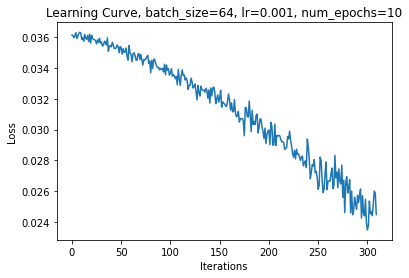

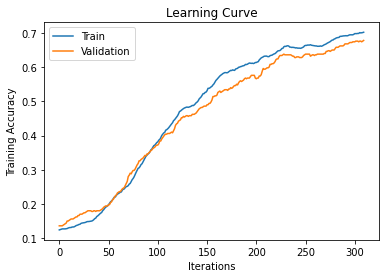

Total Number of Iterations: 310
Final Training Loss: 0.024488557130098343
Final Training Accuracy: 0.702
Final Validation Accuracy: 0.678
Number of parameters in CNN(): 4266


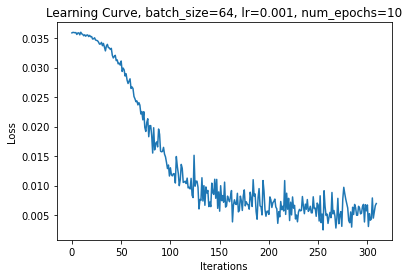

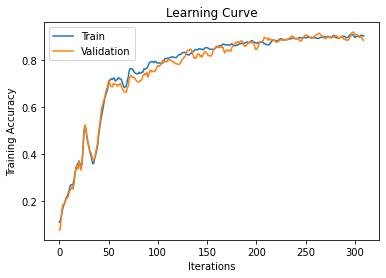

Total Number of Iterations: 310
Final Training Loss: 0.006949516478925943
Final Training Accuracy: 0.9035
Final Validation Accuracy: 0.886
Number of parameters in CNNBN(): 4290


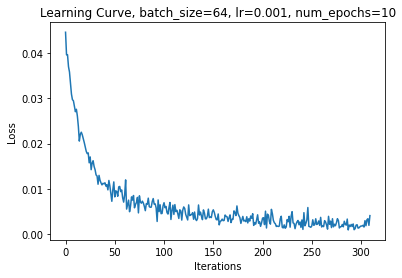

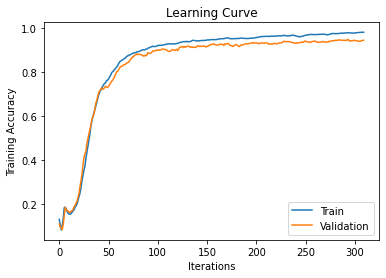

Total Number of Iterations: 310
Final Training Loss: 0.004068726673722267
Final Training Accuracy: 0.9805
Final Validation Accuracy: 0.944


In [ ]:
"""Training"""

def get_accuracy(model, train=False):
    if train:
        data = torch.utils.data.DataLoader(dataset=mnist_train, 
                            batch_size=4096)
    else:
        data = torch.utils.data.DataLoader(dataset=mnist_val,
                            batch_size=1024)
    
    model.eval()
    correct = 0
    total = 0
    for imgs, labels in data: # labels.shape = torch.Size([batch_size])
        output = model(imgs)
        # pred = output.argmax(dim=1, keepdim=False) # pred.shape = torch.Size([batch_size])
        # correct += (pred == labels).sum().item()

        pred = output.max(dim=1, keepdim=True)[1] # pred.shape = torch.Size([batch_size, 1])
        correct += pred.eq(labels.view_as(pred)).sum().item() # labels.view_as(pred).shape = torch.Size([batch_size, 1])
        total += imgs.shape[0]

    return correct / total

def train(model, data, batch_size=64, weight_decay=0.0,
          optimizer='sgd', learning_rate=1e-3, momentum=0.9,
          data_shuffle=True, num_epochs=10):
    
    # training data
    train_loader = torch.utils.data.DataLoader(dataset=data,
                            batch_size=batch_size,
                            shuffle=data_shuffle,)
    # loss function
    criterion = nn.CrossEntropyLoss()

    # optimizer 
    assert optimizer in ("sgd", "adam")
    if optimizer == "sgd":
        optimizer = optim.SGD(model.parameters(), lr=learning_rate,
                    momentum=momentum, weight_decay=weight_decay)
    else:
        optimizer = optim.Adam(model.parameters(),lr=learning_rate,
                    weight_decay=weight_decay)
    
    # track learning curve
    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        
        for imgs, labels in iter(train_loader):
            if imgs.size()[0] < batch_size:
                continue
            
            model.train() # training mode
            output = model(imgs)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # save the current training info
            iters.append(n)
            losses.append(float(loss/batch_size))
            train_acc.append(get_accuracy(model, train=True))
            val_acc.append(get_accuracy(model, train=False))
            n += 1

    
    # plotting
    plt.title(f"Learning Curve, batch_size={batch_size}, lr={learning_rate}, num_epochs={num_epochs}")
    plt.plot(iters, losses, label='Train')
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Learning Curve")
    plt.plot(iters, train_acc, label='Train')
    plt.plot(iters, val_acc, label='Validation')
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print(f'Total Number of Iterations: {n}')
    print(f'Final Training Loss: {losses[-1]:.4f}')
    print(f'Final Training Accuracy: {train_acc[-1]}')
    print(f'Final Validation Accuracy: {val_acc[-1]}')

def print_num_parameters(model, name='model'):
    print(f"Number of parameters in {name}: {sum(p.numel() for p in model.parameters())}")


model = MLP(50)
print_num_parameters(model, "MLP(50)")
train(model, mnist_train, optimizer='sgd' ,learning_rate=1e-3, num_epochs=10)
print('='*80)

model = CNN()
print_num_parameters(model, "CNN()")
train(model, mnist_train, optimizer='adam' ,learning_rate=1e-3, num_epochs=10)
print('='*80)

model = CNNBN()
print_num_parameters(model, "CNNBN()")
train(model, mnist_train, optimizer='adam' ,learning_rate=1e-3, num_epochs=10)
print('='*80)

# Pytorch Lightning

In [ ]:
!pip install pytorch-lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 800 kB 4.8 MB/s 
     |████████████████████████████████| 125 kB 51.6 MB/s 
     |████████████████████████████████| 512 kB 49.7 MB/s 


In [ ]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

import pytorch_lightning as pl
from pytorch_lightning import Trainer


# 0) Data import
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True,
                                           transform=transforms.ToTensor(), 
                                           download=False)
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=batch_size,
                          shuffle=True)

# 1) Model building
class FeedForwardNeuralNet(pl.LightningModule):
    def __init__(self):
        super().__init__()

        # define first layer
        self.l1 = nn.Linear(28*28, 10)

        # activation function
        self.relu = nn.ReLU()

        # define 2nd layer
        self.l2 = nn.Linear(10, 10)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)

        return out
    
    def configure_optimizers(self, learning_rate = 1e-3):
        optimizer = torch.optim.Adam(self.parameters(), lr = learning_rate)

        return optimizer
    
    def training_step(self, batch, batch_idx):
        datas, labels = batch
        outputs = self(datas)
        loss = F.cross_entropy(outputs, labels)

        return loss


model = FeedForwardNeuralNet()
trainer = Trainer()
trainer.fit(model, train_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name | Type   | Params
--------------------------------
0 | l1   | Linear | 7.9 K 
1 | relu | ReLU   | 0     
2 | l2   | Linear | 110   
--------------------------------
8.0 K     Trainable params
0         Non-trainable params
8.0 K     Total params
0.032     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

RuntimeError: ignored

# A more complete MNIST Lightning Module Example
> link: https://pytorch-lightning.readthedocs.io/en/stable/notebooks/lightning_examples/mnist-hello-world.html

In [ ]:
import os

import pandas as pd
import seaborn as sn
import torch
from IPython.core.display import display
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.loggers import CSVLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchmetrics import Accuracy
from torchvision import transforms
from torchvision.datasets import MNIST

PATH_DATASETS = os.environ.get("PATH_DATASETS", ".")
BATCH_SIZE = 256 if torch.cuda.is_available() else 64

# hyper parameters
input_size = 784 #28*28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 1e-3


class LitMNIST(LightningModule):
    # def __init__(self, data_dir=PATH_DATASETS, hidden_size=64, learning_rate=2e-4):
    def __init__(self, input_size, hidden_size=64, learning_rate=2e-4):
        super().__init__()

        # Set our init args as class attributes
        self.data_dir = "./data"
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate

        # Hardcode some dataset specific attributes
        self.num_classes = 10
        self.dims = (1, 28, 28)
        channels, width, height = self.dims
        self.transform = transforms.Compose(
            [
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,)),
            ]
        )

        # Define PyTorch model
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(channels * width * height, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_size, self.num_classes),
        )

        # self.val_accuracy = Accuracy()
        # self.test_accuracy = Accuracy()

    def forward(self, x):
        x = self.model(x)
        return F.log_softmax(x, dim=1)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        return {"loss": loss}

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        preds = torch.argmax(logits, dim=1)
        """        
        self.val_accuracy.update(preds, y)

        # Calling self.log will surface up scalars for you in TensorBoard
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_acc", self.val_accuracy, prog_bar=True)
        """

        return {"val_loss": loss}

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        preds = torch.argmax(logits, dim=1)
        self.test_accuracy.update(preds, y)

        # Calling self.log will surface up scalars for you in TensorBoard
        self.log("test_loss", loss, prog_bar=True)
        self.log("test_acc", self.test_accuracy, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    ####################
    # DATA RELATED HOOKS
    ####################

    
    def prepare_data(self):
        # download
        MNIST(self.data_dir, train=True, download=True)
        MNIST(self.data_dir, train=False, download=True)
    
    def setup(self, stage=None):

        # Assign train/val datasets for use in dataloaders
        if stage == "fit" or stage is None:
            mnist_full = MNIST(self.data_dir, train=True, transform=self.transform)
            self.mnist_train, self.mnist_val = random_split(mnist_full, [55000, 5000])

        # Assign test dataset for use in dataloader(s)
        if stage == "test" or stage is None:
            self.mnist_test = MNIST(self.data_dir, train=False, transform=self.transform)

    

    def train_dataloader(self):
        train_dataset = torchvision.datasets.MNIST(root="./data",
                                train=True,
                                transform=transforms.ToTensor(),
                                download=True)
        return DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE,
                    shuffle=True, num_workers=4,)

    def val_dataloader(self):
        return DataLoader(self.mnist_val, batch_size=BATCH_SIZE, num_workers=4)

    """
    def test_dataloader(self):
        return DataLoader(self.mnist_test, batch_size=BATCH_SIZE)
    """


model = LitMNIST(input_size=input_size)
trainer = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,  # limiting got iPython runs
    max_epochs=3,
    callbacks=[TQDMProgressBar(refresh_rate=20)],
    logger=CSVLogger(save_dir="logs/"),)
trainer.fit(model)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type       | Params
-------------------------------------
0 | model | Sequential | 55.1 K
-------------------------------------
55.1 K    Trainable params
0         Non-trainable params
55.1 K    Total params
0.220     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


# 完整的模型訓練套路(一)
> https://www.youtube.com/watch?v=nm5wWBQJfG0&t=304s </br>


In [ ]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torch import nn
import time
import matplotlib.pyplot as plt

In [ ]:
# to(cuda): nn model, data, loss_fn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### 1) Prepare dataset

In [ ]:
train_data = torchvision.datasets.CIFAR10(root="./data", train=True,
               transform=torchvision.transforms.ToTensor(),download=True)
test_data = torchvision.datasets.CIFAR10(root="./data", train=False,
            transform=torchvision.transforms.ToTensor(),download=True)

Files already downloaded and verified
Files already downloaded and verified


### 2) Data size

In [ ]:
train_data_size = len(train_data)
test_data_size = len(test_data)

print(f"length of train_data: {train_data_size}")
print(f"length of test_data:  {test_data_size}")

length of train_data: 50000
length of test_data:  10000


### 3) DataLoader

In [ ]:
train_dataloader = DataLoader(dataset=train_data, batch_size=64)
test_dataloader = DataLoader(dataset=test_data, batch_size=64)

### 4) Model Building (Neural Network)
> usually write this model in another python file and then import to main file

In [ ]:
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui,self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
            nn.Linear(in_features=64*4*4, out_features=64),
            nn.Linear(in_features=64, out_features=10)
        )
    
    def forward(self, x):
        x = self.model(x)
        return x

# Initiate the model
tudui = Tudui()

# if torch.cuda.is_available():
    #tudui = tudui.cuda() # use cuda
tudui = tudui.to(device)

### 5) Loss function

In [ ]:
loss_fn = nn.CrossEntropyLoss()
# if torch.cuda.is_available():
    # loss_fn = loss_fn.cuda()
loss_fn = loss_fn.to(device)

### 6) Optimizer

In [ ]:
learning_rate = 1e-2
optimizer = torch.optim.SGD(tudui.parameters(), lr=learning_rate)


### 7) Training and Testing
> save model weights

----- Training no.1 has began -----
Time passed: 1.241415023803711 seconds
train step: 100, Loss: 0.45468005537986755
Time passed: 2.4387834072113037 seconds
train step: 200, Loss: 0.5672789216041565
Time passed: 3.6381473541259766 seconds
train step: 300, Loss: 0.548826277256012
Time passed: 4.86793851852417 seconds
train step: 400, Loss: 0.5105779767036438
Time passed: 6.050211191177368 seconds
train step: 500, Loss: 0.5348456501960754
Time passed: 7.257049798965454 seconds
train step: 600, Loss: 0.320191353559494
Time passed: 8.458076477050781 seconds
train step: 700, Loss: 0.548081636428833
Total Loss on Test dataset: 14688.5037
Total Accuracy on Test dataset: 0.6519 
----- Training no.2 has began -----
Time passed: 11.094480514526367 seconds
train step: 800, Loss: 0.34804078936576843
Time passed: 12.279172658920288 seconds
train step: 900, Loss: 0.4338914453983307
Time passed: 13.456011533737183 seconds
train step: 1000, Loss: 0.42363494634628296
Time passed: 14.642049312591553 se

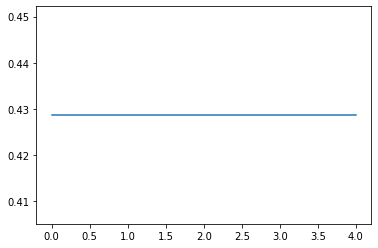

In [ ]:
total_train_step = 0
total_test_step = 0

num_epoch = 5

"""tensorboard"""
# writer = SummaryWriter("./logs_train")
start_time = time.time()

'''record loss'''
losses = []

for i in range(num_epoch):
    print(f'----- Training no.{i+1} has began -----')
    running_loss = 0.0
    epoch_loss = []
    """Traning loop"""
    tudui.train() # This has any effect only on certain modules (Dropout, BatchNorm, etc...)
    for data in train_dataloader:
        imgs, targets = data
        # use cuda
        # if torch.cuda.is_available():
        #     imgs = imgs.cuda()
        #     targets = targets.cuda()
        imgs = imgs.to(device)
        targets = targets.to(device)

        outputs = tudui(imgs)
        loss = loss_fn(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_step += 1
        running_loss += loss.item() * imgs.size(0)
        epoch_loss.append(loss.item() * imgs.size(0))
        
        if total_train_step % 100 == 0:
            end_time = time.time()
            print(f'Time passed: {end_time - start_time} seconds')
            print(f'train step: {total_train_step}, Loss: {loss.item():.4f}')
            # writer.add_scalar("training_loss", loss.item(), total_train_step)
    losses.append(sum(epoch_loss)/train_data_size)
    
    """testing"""
    tudui.eval() # This has any effect only on certain modules (Dropout, BatchNorm, etc...)
    total_test_loss = 0
    total_accuracy = 0
    with torch.no_grad():
        for data in test_dataloader:
            imgs, targets = data
            # use cuda
            imgs = imgs.to(device)
            targets = targets.to(device)
            # if torch.cuda.is_available():
            #     imgs = imgs.cuda()
            #     targets = targets.cuda()

            outputs = tudui(imgs)
            loss = loss_fn(outputs, targets)
            total_test_loss += loss.item() * imgs.size(0)
            accuracy = (outputs.argmax(dim=1, keepdim=False) == targets).sum().item()
            total_accuracy += accuracy
    print(f"Total Loss on Test dataset: {total_test_loss:.4f}")
    # writer.add_scalar("testing_loss", total_test_loss.item(), total_test_step)
    print(f"Total Accuracy on Test dataset: {total_accuracy/test_data_size:.4f} ")
    total_test_step += 1

    # torch.save(tudui, f"tudui_gpu{i}.pth")
    # torch.save(tudui.state_dict(), "tudui_{i}.pth") # 官方推薦保存方式
    # print("Model weights have been saved.")

# writer.close()
plt.plot(losses)
plt.show()

In [ ]:
!nvidia-smi

Mon Dec 19 07:14:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    30W /  70W |   1200MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 8) Test with other data

In [ ]:

model = torch.load("tudui_0.pth")

# If your model was trained on GPU, but you want to test on CPU
# model = torch.load("tudui_0.pth", map_location=torch.device('cpu'))

print(model)

# image = some image
test_img = torch.reshape(image, (1, 3, 32, 32))

model.eval()
with torch.no_grad():
    output = model(image)
print(output)

print(output.argmax(dim=1)) 


Tudui(
  (model): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=1024, out_features=64, bias=True)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)


# 分類網路的實現

## VGG

In [ ]:

import torch
from torch import nn
import torch.nn.functional as F
from torchsummary import summary

"""
建立VGG時須提供一個cfg清單, 其中數字對應的序號為卷積層,
數字代表卷積層的通道數量, M對應的網路層為池化層
"""

class VGG(nn.Module):
    def __init__(self, cfg, num_classes=10):
        super(VGG, self).__init__()
        self.features = self._make_layers(cfg)
        self.classifier = nn.Linear(512, num_classes)
    
    #
    def _make_layers(self, cfg):
        layers = []
        in_channels = 3
        for x in cfg:
            if x == "M":
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [
                    nn.Conv2d(in_channels=in_channels, out_channels=x, kernel_size=3, padding=1),
                    nn.BatchNorm2d(num_features=x),
                    nn.ReLU(inplace=True),
                ]
                in_channels = x
        
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return out


def vgg11():
    cfg = [64, "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"]
    return VGG(cfg)

vggNet = vgg11().cuda()
summary(vggNet,(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5          [-1, 128, 16, 16]          73,856
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
         MaxPool2d-8            [-1, 128, 8, 8]               0
            Conv2d-9            [-1, 256, 8, 8]         295,168
      BatchNorm2d-10            [-1, 256, 8, 8]             512
             ReLU-11            [-1, 256, 8, 8]               0
           Conv2d-12            [-1, 256, 8, 8]         590,080
      BatchNorm2d-13            [-1, 256, 8, 8]             512
             ReLU-14            [-1, 25

## ResNet

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchsummary import summary

class BasicBlock(nn.Module):
    def __init__(self, in_channels:int, mid_channels:int, stride=1):
        """
        in_channels: input channel
        mid_channels: intermediate and output channels
        """
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels=in_channels,
            out_channels=mid_channels,
            kernel_size=3,
            stride=stride,
            padding=1,
            bias=False
        )
        self.bn1 = nn.BatchNorm2d(num_features=mid_channels)
        self.conv2 = nn.Conv2d(
            in_channels=mid_channels,
            out_channels=mid_channels,
            kernel_size=3,
            stride=1,
            padding=1,
            bias=False
        )
        self.bn2 = nn.BatchNorm2d(num_features=mid_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != mid_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(
                    in_channels=in_channels,
                    out_channels=mid_channels,
                    kernel_size=1,
                    stride=stride,
                    bias=False
                ),
                nn.BatchNorm2d(num_features=mid_channels)
            )
    
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x) # 累加兩個分支
        out = F.relu(out)
        return out

"""
建構ResNet時需要向函數提供兩個參數:
1. 基礎模組的類別名(eg. BasicBlock)
2. 每層中包含的基礎模組數量

ResNet中的基礎模組由:
兩個Conv2D, 
兩個BatchNorm,
一個shorcut層(包含一個Conv2D和一個BatchNorm) 組成
"""
class ResNet(nn.Module):
    def __init__(self, block: BasicBlock, num_blocks:list, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(
            in_channels=3,
            out_channels=64,
            kernel_size=3,
            stride=1,
            padding=1,
            bias=False
        )
        self.bn1 = nn.BatchNorm2d(num_features=64)
        # 架設basicblock
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        # 最後的線性層
        self.linear = nn.Linear(512, num_classes)
    
    def _make_layer(self, block:BasicBlock, mid_channels:int, num_blocks:list, stride:int):
        # stride 僅指定第一個block的stride, 後面的stride都是1
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, mid_channels, stride))
            self.in_channels = mid_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out



def resnet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])

resnet = resnet18().cuda()
summary(resnet, (3, 32, 32))

        

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

# TensorBoard Example with MNIST

Epoch [1/1], Step [100/938], Loss: 0.2915
Epoch [1/1], Step [200/938], Loss: 0.3305
Epoch [1/1], Step [300/938], Loss: 0.2819
Epoch [1/1], Step [400/938], Loss: 0.2760
Epoch [1/1], Step [500/938], Loss: 0.2472
Epoch [1/1], Step [600/938], Loss: 0.1053
Epoch [1/1], Step [700/938], Loss: 0.1094
Epoch [1/1], Step [800/938], Loss: 0.1695
Epoch [1/1], Step [900/938], Loss: 0.1002
Accuracy of the network on the 10000 test images: 96.16 %
ok


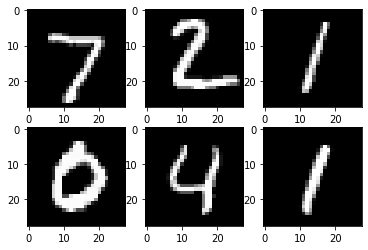

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

############## TENSORBOARD ########################
import sys
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/mnist1')
###################################################

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 1
batch_size = 64
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
#plt.show()

############## TENSORBOARD ########################
img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist_images', img_grid)
#writer.close()
#sys.exit()
###################################################

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

############## TENSORBOARD ########################
writer.add_graph(model, example_data.reshape(-1, 28*28))
#writer.close()
#sys.exit()
###################################################

# Train the model
running_loss = 0.0
running_correct = 0
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == labels).sum().item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            ############## TENSORBOARD ########################
            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
            running_accuracy = running_correct / 100 / predicted.size(0)
            writer.add_scalar('accuracy', running_accuracy, epoch * n_total_steps + i)
            running_correct = 0
            running_loss = 0.0
            ###################################################

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
class_labels = []
class_preds = []
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        values, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        class_probs_batch = [F.softmax(output, dim=0) for output in outputs]

        class_preds.append(class_probs_batch)
        class_labels.append(predicted)

    # 10000, 10, and 10000, 1
    # stack concatenates tensors along a new dimension
    # cat concatenates tensors in the given dimension
    class_preds = torch.cat([torch.stack(batch) for batch in class_preds])
    class_labels = torch.cat(class_labels)

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

    ############## TENSORBOARD ########################
    classes = range(10)
    for i in classes:
        labels_i = class_labels == i
        preds_i = class_preds[:, i]
        writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
        writer.close()
    ###################################################

    print("ok")

# Decoder Encoder (with ResNet18)

In [ ]:
"""
使用ResNet18中的特徵提取部分充當Encoder, 使用自訂的Decoder模組充當Decoder,
然後將Encoder和Decoder都加入UNet網路中.

先計算Encoder, 保存Encoder每一個模組的結果, 並將最終的計算結果輸入Decoder模組.
逐步進行Decoding, 將每次運算的結果輸入與之前保存的Encoder中間結果進行拼接,
再輸入下一個解碼模組進行計算, 最後得到分割圖片.


"""


import torch
from torch import nn
from torchvision.models import resnet18

"""Decoder"""
class DecoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size):
        super().__init__()
        self.conv1 = nn.Conv2d(
            in_channels=in_channels, out_channels=in_channels//4, kernel_size=kernel_size, padding=1, bias=False
        )
        self.bn1 = nn.BatchNorm2d(num_features=in_channels//4)
        self.relu1 = nn.ReLU(inplace=True)
        # 反卷積
        self.deconv = nn.ConvTranspose2d(
            in_channels=in_channels//4, out_channels=in_channels//4, kernel_size=3,
            stride=2, padding=1, output_padding=1, bias=False
        )
        self.bn2 = nn.BatchNorm2d(num_features=in_channels//4)
        self.relu2 = nn.ReLU(inplace=True)
        self.conv3 = nn.Conv2d(
            in_channels=in_channels//4,
            out_channels=out_channels,
            kernel_size=kernel_size,
            padding=1,
            bias=False
        )
        self.bn3 = nn.BatchNorm2d(num_features=out_channels)
        self.relu3 = nn.ReLU(inplace=True)
    
    def forward(self, x):
        x = self.relu1(self.bn1(self.conv1(x)))
        x = self.relu2(self.bn2(self.deconv(x)))
        x = self.relu3(self.bn3(self.conv3(x)))
        return x

"""ResNet18UNet"""
class ResNet18UNet(nn.Module):
    def __init__(self, num_classes=2, pretrained=True):
        super().__init__()
        base = resnet18(pretrained=pretrained)
        # 將ResNet18的前幾層複製到ResNet18UNet中
        self.firstconv = base.conv1
        self.firstbn = base.bn1
        self.firstrelu = base.relu
        self.firstmaxpool = base.maxpool
        # 將ResNet18中的layer作為編碼器Encoder
        self.encoder1 = base.layer1
        self.encoder2 = base.layer2
        self.encoder3 = base.layer3
        self.encoder4 = base.layer4
        # Decoder的輸出通道量
        out_channels = [64, 128, 256, 512]
        # 使用Decoder 定義解碼器
        self.center = DecoderBlock(
            in_channels=out_channels[3],
            out_channels=out_channels[3],
            kernel_size=3
        )
        self.decoder4 = DecoderBlock(
            in_channels=out_channels[3] + out_channels[2],
            out_channels=out_channels[2],
            kernel_size=3
        )       
        self.decoder3 = DecoderBlock(
            in_channels=out_channels[2] + out_channels[1],
            out_channels=out_channels[1],
            kernel_size=3
        )
        self.decoder2 = DecoderBlock(
            in_channels=out_channels[1] + out_channels[0],
            out_channels=out_channels[0],
            kernel_size=3
        ) 
        self.decoder1 = DecoderBlock(
            in_channels=out_channels[0] + out_channels[0],
            out_channels=out_channels[0],
            kernel_size=3
        )
        # 最後增加一個卷積層將特徵圖維度整理成圖片對應的尺寸
        self.finalconv = nn.Sequential(
            nn.Conv2d(in_channels=out_channels[0], out_channels=32, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.Dropout2d(p=0.1, inplace=False),
            nn.Conv2d(in_channels=32, out_channels=num_classes, kernel_size=1)
        )
    
    def forward(self, x):
        # 前置處理
        x = self.firstconv(x)
        x = self.firstbn(x)
        x = self.firstrelu(x)
        x_ = self.firstmaxpool(x)

        # Encoder DownSampling
        e1 = self.encoder1(x_)
        e2 = self.encoder2(e1)
        e3 = self.encoder3(e2)
        e4 = self.encoder4(e3)

        # Decoder UpSampling
        center = self.center(e4)
        d4 = self.decoder4(torch.cat([center, e3], dim=1))
        d3 = self.decoder3(torch.cat([d4, e2], dim=1))
        d2 = self.decoder2(torch.cat([d3, e1], dim=1))
        d1 = self.decoder1(torch.cat([d2, x], dim=1))

        # output image
        f = self.finalconv(d1)
        return f


net = ResNet18UNet(pretrained=False)
img = torch.rand(1, 3, 320, 320)
out = net(img)
print(out.shape)


torch.Size([1, 2, 320, 320])


# AutoEncoder with training

In [ ]:
"""

"""

import torch
from torch import nn
from torchvision.models import resnet18


"""Decoder"""
class DecoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size):
        super().__init__()
        self.conv1 = nn.Conv2d(
            in_channels=in_channels, 
            out_channels=in_channels//4, 
            kernel_size=kernel_size, 
            padding=1, 
            bias=False
        )
        self.bn1 = nn.BatchNorm2d(num_features=in_channels//4)
        self.relu1 = nn.ReLU(inplace=True)
        # 反卷積
        self.deconv = nn.ConvTranspose2d(
            in_channels=in_channels//4, 
            out_channels=in_channels//4, 
            kernel_size=3,
            stride=2, 
            padding=1, 
            output_padding=1, 
            bias=False
        )
        self.bn2 = nn.BatchNorm2d(num_features=in_channels//4)
        self.relu2 = nn.ReLU(inplace=True)
        self.conv3 = nn.Conv2d(
            in_channels=in_channels//4,
            out_channels=out_channels,
            kernel_size=kernel_size,
            padding=1,
            bias=False
        )
        self.bn3 = nn.BatchNorm2d(num_features=out_channels)
        self.relu3 = nn.ReLU(inplace=True)
    
    def forward(self, x):
        x = self.relu1(self.bn1(self.conv1(x)))
        x = self.relu2(self.bn2(self.deconv(x)))
        x = self.relu3(self.bn3(self.conv3(x)))
        return x


"""AutoEncoder"""
class AutoEncoder(nn.Module):
    def __init__(self, num_classes=1, pretrained=True):
        super().__init__()
        # 以ResNet18為基礎
        base = resnet18(pretrained=pretrained)
        # 因為是黑白圖片,只有一通道,需要重新定義第一層
        self.firstconv = nn.Conv2d(
            in_channels=1,
            out_channels=64,
            kernel_size=7,
            stride=2,
            padding=3,
            bias=False
        )
        self.firstbn = base.bn1
        self.firstrelu = base.relu
        self.firstmaxpool = base.maxpool
        self.encoder1 = base.layer1
        self.encoder2 = base.layer2
        self.encoder3 = base.layer3
        self.encoder4 = base.layer4
        # Decoder輸出channel
        out_channels = [64, 128, 256, 512]
        # 建立解碼區塊
        self.center = DecoderBlock(
            in_channels=out_channels[3],
            out_channels=out_channels[3],
            kernel_size=3
        )        
        self.decoder4 = DecoderBlock(
            in_channels=out_channels[3],
            out_channels=out_channels[2],
            kernel_size=3
        )
        self.decoder3 = DecoderBlock(
            in_channels=out_channels[2],
            out_channels=out_channels[1],
            kernel_size=3
        )
        self.decoder2 = DecoderBlock(
            in_channels=out_channels[1],
            out_channels=out_channels[0],
            kernel_size=3
        )
        self.decoder1 = DecoderBlock(
            in_channels=out_channels[0],
            out_channels=out_channels[0],
            kernel_size=3
        )
        # 透過最後兩層卷積來輸出整理成圖片對應的尺寸
        self.finalconv = nn.Sequential(
            nn.Conv2d(
                in_channels=out_channels[0],
                out_channels=32,
                kernel_size=3,
                padding=1,
                bias=False
            ),
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.Dropout2d(p=0.1, inplace=False),
            nn.Conv2d(
                in_channels=32,
                out_channels=num_classes,
                kernel_size=1
            ),
        )

    def forward(self, x, extract_features=False):
        x = self.firstconv(x)
        x = self.firstbn(x)
        x = self.firstrelu(x)
        x = self.firstmaxpool(x)

        # Encoder
        x = self.encoder1(x)
        x = self.encoder2(x)
        x = self.encoder3(x)
        x = self.encoder4(x)

        # 在執行壓縮的時候可以直接將extract_feature設定為True
        # 就可以得到壓縮後的圖片矩陣了
        if extract_features:
            return x
        
        # Decoder
        x = self.center(x)
        x = self.decoder4(x)
        x = self.decoder3(x)
        x = self.decoder2(x)
        x = self.decoder1(x)

        # 整理輸出
        f = self.finalconv(x)
        return f

from torchsummary import summary
inp = torch.ones((1, 1, 128, 128))
net = AutoEncoder()
out = net(inp, extract_features=False)
print(out.shape)
# summary(net, (1, 224, 224))

torch.Size([1, 1, 128, 128])


### Data Loading

In [ ]:
# confiy.py
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

SIZE = 128
BATCH_SIZE = 16
EPOCH_LR = [(30, 0.01), (30, 0.001), (50, 0.001)]
CHECKPOINTS = "/data/image/research"
DATA_FOLDER = "/data/pubfig_faces"

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from glob import glob
import os.path as osp
from PIL import Image

class MyData(Dataset):
    def __init__(self, folder=DATA_FOLDER, subset="train", transform=None):
        img_paths = glob(osp.join(DATA_FOLDER, "*/*.jpg"))
        train_paths, test_paths = train_test_split(
            img_paths, test_size=0.2, random_state=10
        )

        if subset == "train":
            self.img_paths = train_paths
        else:
            self.img_paths = test_paths

        if transform is None:
            self.transform = transforms.Compose([
                transforms.Resize((SIZE, SIZE)), transforms.ToTensor()
            ])
        
        else:
            self.transform = transform
        
        def __getitem__(self, idx):
            img = Image.open(self.img_paths[idx]).convert("L") # Images need to be black-and-white only
            img = self.transform(img)
            return img, img
        
        def __len__(self):
            return len(self.img_paths)


###
transform = transforms.Compose([
    transforms.Resize((SIZE, SIZE)),
    transforms.ToTensor()
])

train_data = MyData(subset="train", transform=transform)
val_data = MyData(subset='test')

train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=BATCH_SIZE*2, shuffle=False)


### Training Step

In [ ]:
from tqdm import tqdm

def train():
    net = AutoEncoder(pretrianed=True).to(device)
    criterion = nn.L1Loss()

    ### Check if there are pre-saevd models
    '''
    check_pt = osp.join(CHECKPOINT, "net.pth")

    if ops.exists(check_pt):
        net.load_state_dict(torch.load(check_pt))
    '''

    # train with different epoch and lr
    for n, (num_epochs, lr) in enumerate(EPOCH_LR):
        optimizer = optim.Adam(net.parameters(), lr=lr)
        for epoch in range(num_epochs):
            epoch_loss = 0.0
            for i, (src, target) in tqdm(enumerate(train_loader), total=len(train_loader)):
                optimizer.zero_grad()
                src, target = src.to(device), target.to(device)
                out = net(src)
                loss = criterion(out, target)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()
            print(
                f"Epoch: {sum([e[0] for e in EPOCH_LR[:n]]) + epoch}, epoch_loss:{epoch_loss/len(train_loader)}"
            )

            ### evaluation
            with torch.no_grad():
                val_loss = 0.0
                for i, (src, target) in tqdm(enumerate(val_loader), total=len(val_loader)):
                    src, target = src.to(device), target.to(device)
                    out = net(src)
                    loss = criterion(out, target)
                    val_loss += loss.item()
            
            print(
            f'val: {sum([e[0] for e in EPOCH_LR[:n]])+ epoch}, val_loss: {val_loss/len(val_loader)}'
            )
            

# Autoencoder(Linear) Example #1
with MNIST dataset and training loop

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [ ]:
transform = transforms.ToTensor()
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5), (0.5))
# ])


mnist_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

data_loader = DataLoader(dataset=mnist_data, 
                batch_size=64,
                shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
dataiter = iter(data_loader)
images, labels = next(dataiter)
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        # N, 784 -> batch_size, 28*28
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128), # reduce size from N,784 -> N,128
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3), # output size -> N,3
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12), 
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid() # Note: If data range from [-1, 1] then -> nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded



model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)


'''Training Loop'''
num_epochs = 10
outputs = []

for epoch in range(num_epochs):
    for (img, _) in data_loader:
        img = img.reshape(-1, 28*28)
        recon = model(img)
        loss = criterion(recon, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch:{epoch+1}/{num_epochs}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))


Epoch:1/10, Loss:0.0546
Epoch:2/10, Loss:0.0442
Epoch:3/10, Loss:0.0369
Epoch:4/10, Loss:0.0380
Epoch:5/10, Loss:0.0339
Epoch:6/10, Loss:0.0366
Epoch:7/10, Loss:0.0377
Epoch:8/10, Loss:0.0388
Epoch:9/10, Loss:0.0299
Epoch:10/10, Loss:0.0348


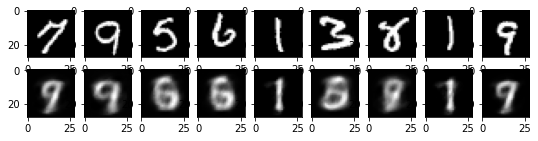

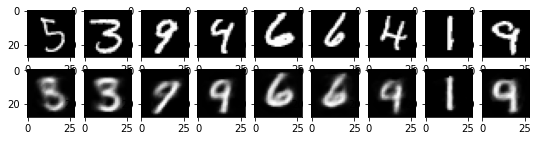

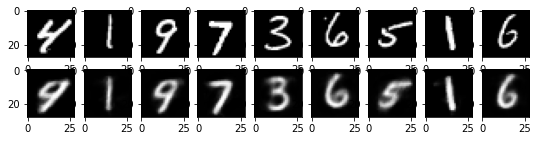

In [ ]:
"""Display Results"""
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28, 28)
        # item: 1, 28, 28
        plt.imshow(item[0])
    
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        item = item.reshape(-1, 28, 28)
        # item: 1, 28, 28
        plt.imshow(item[0])

# Autoencoder(CNN) Example #2
https://www.cs.toronto.edu/~lczhang/360/lec/w02/training.html

https://www.cs.toronto.edu/~lczhang/321/lec/autoencoder_notes.html

In [ ]:

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.ToTensor()

mnist_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

mnist_data_size = len(mnist_dataset)

data_loader = DataLoader(dataset=mnist_dataset,
                batch_size=64,
                shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
"""Look at a sample data"""
imgs, labels = next(iter(data_loader))
print(imgs.shape)
print(labels.shape)
print(imgs.size(0))

torch.Size([64, 1, 28, 28])
torch.Size([64])
64


In [ ]:
"""Model Construction"""

class Autoencoder_CNN(nn.Module):
    def __init__(self):
        # input size = (N, 1, 28, 28)
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=1, 
                out_channels=16, 
                kernel_size=3, 
                stride=2, 
                padding=1), # N, 16, 14, 14
            nn.ReLU(),
            nn.Conv2d(in_channels=16, 
                out_channels=32, 
                kernel_size=3, 
                stride=2, 
                padding=1), # N, 32, 7, 7
            nn.ReLU(),
            nn.Conv2d(in_channels=32, 
                out_channels=64, 
                kernel_size=7), # N, 64, 1, 1
        )

        # N, 64, 1, 1
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64, 
                    out_channels=32, 
                    kernel_size=7), # N, 32, 7, 7
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=32, 
                    out_channels=16, 
                    kernel_size=3, 
                    stride=2, 
                    padding=1, 
                    output_padding=1), # N, 16, 13+1, 13+1
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=16, 
                    out_channels=1, 
                    kernel_size=3, 
                    stride=2, 
                    padding=1, 
                    output_padding=1), # N, 1, 28, 28
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [ ]:
def interpolate(AEmodel, idx1, idx2):
    """
    Structure in the Embeddings
    https://www.cs.toronto.edu/~lczhang/321/lec/autoencoder_notes.html
    """
    x1 = mnist_dataset[idx1][0]
    x2 = mnist_dataset[idx2][0]
    x = torch.stack([x1, x2])
    embedding = AEmodel.encoder(x)
    e1 = embedding[0]
    e2 = embedding[1]

    embedding_values = []
    for i in range(0, 10):
        e = e1 * (i/10) + e2 * (10-i)/10
        embedding_values.append(e)
    
    embedding_values = torch.stack(embedding_values)
    recons = AEmodel.decoder(embedding_values)
    
    plt.figure(figsize=(10,2))
    for i, recon in enumerate(recons.detach().numpy()):
        plt.subplot(2, 10, i+1)
        plt.imshow(recon[0])
    
    plt.subplot(2, 10, 11)
    plt.imshow(x2[0])
    plt.subplot(2, 10, 20)
    plt.imshow(x1[0])

---------- Epoch: 0 Starting ----------
Iteration: 100, mini_batch_average Loss: 0.0010285526514053345
Iteration: 200, mini_batch_average Loss: 0.0008850115700624883
Iteration: 300, mini_batch_average Loss: 0.0005692445556633174
Iteration: 400, mini_batch_average Loss: 0.0003657293855212629
Iteration: 500, mini_batch_average Loss: 0.00026588517357595265
Iteration: 600, mini_batch_average Loss: 0.0002051485498668626
Iteration: 700, mini_batch_average Loss: 0.00019029936811421067
Iteration: 800, mini_batch_average Loss: 0.00017852337623480707
Iteration: 900, mini_batch_average Loss: 0.00015258704661391675
Epoch:0, Loss:0.0001697706466075033
---------- Epoch: 1 Starting ----------
Iteration: 1000, mini_batch_average Loss: 0.00011871113383676857
Iteration: 1100, mini_batch_average Loss: 0.00012327621516305953
Iteration: 1200, mini_batch_average Loss: 0.00011445104610174894
Iteration: 1300, mini_batch_average Loss: 0.00011514378275023773
Iteration: 1400, mini_batch_average Loss: 0.000117227

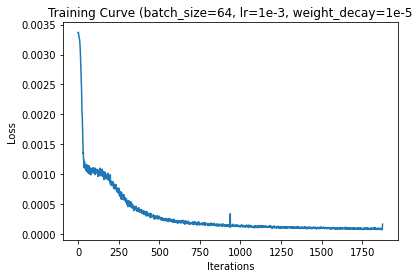

========== Interoplation ==========
<class 'int'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
3
---------- Plotting Learning Results ----------


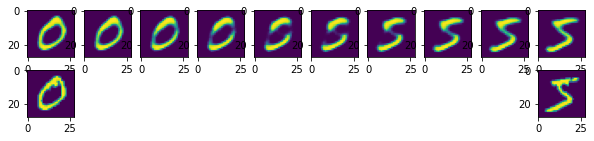

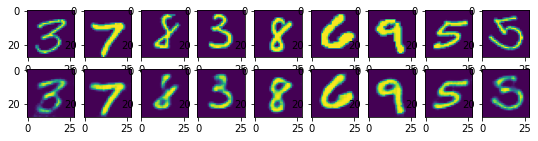

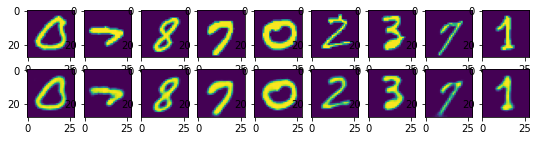

In [ ]:

"""Training Loop"""
def train(model, data=mnist_dataset, num_epochs=5, batch_size=64, lr=1e-3, optimizer="adam", momentum=0.9,
        weight_decay=0.0, shuffle_data=True) -> list:
    """
    Returns output = [(epoch, img, reconstructed)]
    """

    torch.manual_seed(42)
    
    # loss function
    criterion = nn.MSELoss()
    
    # optimizer 
    assert optimizer in ("sgd", "adam")
    if optimizer == "sgd":
        optimizer = torch.optim.SGD(model.parameters(), lr=lr,
                    momentum=momentum, weight_decay=weight_decay)
    else:
        optimizer = torch.optim.Adam(model.parameters(),lr=lr,
                    weight_decay=weight_decay)
    # DataLoader
    train_loader = torch.utils.data.DataLoader(dataset=data,
                            batch_size=batch_size,
                            shuffle=shuffle_data)


    outputs = []
    iters = []
    count_iter = 0
    losses = []

    for epoch in range(num_epochs):
        print(f'---------- Epoch: {epoch} Starting ----------')
        for i, (imgs, _) in enumerate(train_loader):
            recons = model(imgs)
            loss = criterion(recons, imgs)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            

            # save the current training information
            iters.append(count_iter)
            losses.append(float(loss)/imgs.size(0)) # computer the average loss
            
            count_iter += 1

            if count_iter % 100 == 0:
                print(f'Iteration: {count_iter}, mini_batch_average Loss: {float(loss)/imgs.size()[0]}') # compute average loss


        print(f'Epoch:{epoch}, Loss:{float(loss)/batch_size}')
        outputs.append((epoch, imgs, recons))


    '''Plotting loss vs. iteration'''
    plt.plot(iters, losses)
    plt.title("Training Curve (batch_size=64, lr=1e-3, weight_decay=1e-5")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    print('========== Interoplation ==========')
    interpolate(model, 0, 1)

    return outputs, num_epochs

outputs, num_epochs = train(Autoencoder_CNN(),num_epochs=2)

print(type(outputs[0][0])) # <class 'int'>
print(type(outputs[0][1])) # <class 'torch.Tensor'>
print(type(outputs[0][2])) # <class 'torch.Tensor'>
print(len(outputs[0])) # 3

"""Plotting"""
print("-"*10,"Plotting Learning Results","-"*10)
for k in range(0, num_epochs, 1):
    plt.figure(figsize=(9, 2))
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    
    for i, item in enumerate(imgs):
        if i >= 9: break
        # plt.suptitle("Original Images")
        plt.subplot(2, 9, i+1)

        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)

        plt.imshow(item[0])


# Adversarial Examples (with MNIST)

讓系統誤認目標，混淆視聽

https://www.cs.toronto.edu/~lczhang/360/lec/w09/adv.html

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# set random seed for reproducibility
manualSeed = 999
print(f"Random seed: {manualSeed}")
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random seed: 999


In [ ]:
mnist_data = datasets.MNIST(root='./data',
                train=True,
                download=True,
                transform=transforms.ToTensor())


In [ ]:
class FCNet(nn.Module):
    def __init__(self):
        super().__init__()
        print("* --------------- FCNet --------------- *")
        self.layer1 = nn.Linear(28*28, 50)
        self.layer2 = nn.Linear(50, 20)
        self.layer3 = nn.Linear(20, 10)
    def forward(self, img):
        flattened = img.view(-1, 28*28)
        x = F.relu(self.layer1(flattened))
        x = F.relu(self.layer2(x))
        output = self.layer3(x)
        return output

class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        print("* --------------- ConvNet --------------- *")
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5,
                    kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10,
                    kernel_size=5, padding=2)
        self.fc1 = nn.Linear(in_features=10*7*7, out_features=32)
        self.fc2 = nn.Linear(in_features=32, out_features=10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.reshape(-1, 10*7*7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1)
        """
        input_size = (N, 1, 28, 28)
        after conv1 = (N, 5, 28, 28)
        after pooling = (N, 5, 14, 14)
        after conv2 = (N, 10, 14, 14)
        after pooling = (N, 10, 7, 7)
        after reshape = (N, 10*7*7)
        after fc1 = (N, 32)
        after fc2 = (N, 10)
        """
        return x

"""
x = torch.randn(32, 1, 28, 28)
conv1 = nn.Conv2d(1, 5, 5, padding=2)
y = conv1(x)
y = nn.MaxPool2d(2,2)(y)
z = nn.Conv2d(5, 10, kernel_size=5, padding=2)(y)
z = nn.MaxPool2d(2,2)(z)
z = z.reshape(-1, 7*7*10)
z = nn.Linear(10*7*7, 32)(z)
z = nn.Linear(32, 10)(z)
z = z.squeeze(1)

z.shape
"""



'\nx = torch.randn(32, 1, 28, 28)\nconv1 = nn.Conv2d(1, 5, 5, padding=2)\ny = conv1(x)\ny = nn.MaxPool2d(2,2)(y)\nz = nn.Conv2d(5, 10, kernel_size=5, padding=2)(y)\nz = nn.MaxPool2d(2,2)(z)\nz = z.reshape(-1, 7*7*10)\nz = nn.Linear(10*7*7, 32)(z)\nz = nn.Linear(32, 10)(z)\nz = z.squeeze(1)\n\nz.shape\n'

In [ ]:
def train(model, data=mnist_data, batch_size=64, lr=1e-3, 
          num_iters=1000, print_every=100):
    """
    epoch = 1
    Every epoch there are 60,000 / 64 = 937.5 -> 937 updates (iterations)
    """
    train_loader = torch.utils.data.DataLoader(dataset=data,
                            batch_size=batch_size,
                            shuffle=True)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    losses, iters = [], []
    running_loss = 0
    n = 0

    for imgs, labels in iter(train_loader): # len(train_loader) = 937

        if n > num_iters-1: # n will be 937 if we only do 1 epoch
            break

        out = model(imgs)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        """
        running_loss: cummulative loss in one epoch
        running_loss = loss.item() * imgs.size(0),
        where loss.item() is the avg_mini_batch_loss. To get the total loss in one mini_batch of training, we need to 
        multiply by imgs.size(0) -> batch_size
        This running_loss / len(train_loader) should be shown at the end of each epoch
        """
        running_loss += (loss.item() * imgs.size()[0]) # cummulative loss

        """
        The losses:list here records the avg_mini_batch_loss in one mini_batch of training.
        loss.item() is the avg_mini_batch_loss and should be shown in each mini_batch
        
        One iteration == One mini_batch
        """ 
        losses.append(loss.item()) # compute average loss
        
        iters.append(n) 
        
        n += 1 
  
        if (n % print_every == 0):
            # print(f'Iter: {n}, Loss: {running_loss/len(data)}')
            print(f'Iter: {n}, One mini_batch Mean Loss: {loss.item():>.4f}, One mini_batch Total Loss: {loss.item()*imgs.size(0):>.4f}')

    print("="*80)
    print(f'Total iterations = # of mini_batches run = {len(iters)}')    
    print(f'Total Mean Loss in 1 epoch: {running_loss/len(train_loader):.4f}')
    print(f'Final Mean Loss in 1 mini_batch: {losses[-1]:.4f}')
    print("="*80)
    plt.plot(iters, losses)
    plt.title(f"Training Curve (num_iters={num_iters}, lr={lr})")
    plt.xlabel("Iterations (# of mini_batches)")
    plt.ylabel("Mean Loss per mini_batch")

    plt.text(400, 1.0, f'final mean loss per mini_batch\n= {losses[-1]:.4f}',fontsize=10,
        bbox=dict(facecolor='red',alpha=0.7))
    plt.show()


In [ ]:
'''Train with epochs'''
def train_with_epochs(model, data=mnist_data, batch_size=64, lr=1e-3,
            num_epochs=2):
    """
    epoch = num_epochs
    Every epoch there are 60,000 / 64 = 937.5 -> 937 updates (iterations)
    """
    print("Training Loop Begins ...")

    train_loader = torch.utils.data.DataLoader(dataset=data,
                            batch_size=batch_size,
                            shuffle=True)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    losses = [] # this is avg_mini_batch_loss (avg_loss) in each iteration, so this is outside epoch loop
    iters = [] # to record each iteration, so this is outside epoch loop

    n = 0 # to record total iterations (total steps), so this is outside epoch loop


    for epoch in range(num_epochs):

        running_loss = 0 # running loss in each epoch to be printed after each epoch, so this is INSIDE epoch loop     

        for imgs, labels in iter(train_loader): # run the following in each epoch

            out = model(imgs)
            loss = criterion(out, labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            """
            running_loss: cummulative loss in one epoch
            running_loss = loss.item() * imgs.size(0),
            where loss.item() is the avg_mini_batch_loss. To get the total loss in one mini_batch of training, we need to 
            multiply by imgs.size(0) -> batch_size
            This running_loss / len(train_loader) should be shown at the end of each epoch
            """
            running_loss += (loss.item() * imgs.size()[0]) # cummulative loss

            """
            The losses:list here records the avg_mini_batch_loss in one mini_batch of training.
            loss.item() is the avg_mini_batch_loss and should be shown in each mini_batch
            
            One iteration == One mini_batch
            
            Plot for each epoch
            Plot for total training duration 
            """ 
            losses.append(loss.item()) # compute average loss
            
            iters.append(n) 
            
            n += 1 
    
            if (n % (batch_size * 4) == 0):
                # print(f'Iter: {n}, Loss: {running_loss/len(data)}')
                print(f'\tEpoch [{epoch+1}/{num_epochs}]\tIter: [{n}/{len(train_loader) * (epoch+1)}], One mini_batch Mean Loss: {loss.item():5>.4f}\tOne mini_batch Total Loss: {loss.item()*imgs.size(0):7>.4f}')

        print(f'\tEpoch [{epoch+1}/{num_epochs}]\tTotal Epoch Mean Loss: {running_loss/len(train_loader):.4f}')
        print(" ")

    print("* ------------------------------------- *")
    print("Training Results...")
    print(f'\tTotal iterations = # of mini_batches run = {len(iters)}') # outside epoch loop   
    print(f'\tFinal Mean Loss in 1 mini_batch: {losses[-1]:.4f}') # outside epoch loop
    print(f'\tFinal Mean Loss in 1 epoch: {running_loss/len(train_loader):.4f}')
    print("* ------------------------------------- *")

    plt.plot(iters, losses)
    plt.title(f"Training Curve (num_epochs={num_epochs}, iterations={len(iters)}, lr={lr})")
    plt.xlabel("$Iterations(number\:of\:mini\:batches)$")
    plt.ylabel("Mean Loss per mini_batch")

    plt.text(400, 1.0, f'final mini_batch mean loss\n= {losses[-1]:.4f}',fontsize=10,
        bbox=dict(facecolor='red',alpha=0.7))
    plt.show()


* --------------- FCNet --------------- *
Training Loop Begins ...
	Epoch [1/2]	Iter: [256/938], One mini_batch Mean Loss: 0.4209	One mini_batch Total Loss: 26.9384
	Epoch [1/2]	Iter: [512/938], One mini_batch Mean Loss: 0.3261	One mini_batch Total Loss: 20.8681
	Epoch [1/2]	Iter: [768/938], One mini_batch Mean Loss: 0.2796	One mini_batch Total Loss: 17.8963
	Epoch [1/2]	Total Epoch Mean Loss: 29.6231
 
	Epoch [2/2]	Iter: [1024/1876], One mini_batch Mean Loss: 0.1805	One mini_batch Total Loss: 11.5502
	Epoch [2/2]	Iter: [1280/1876], One mini_batch Mean Loss: 0.1468	One mini_batch Total Loss: 9.3921
	Epoch [2/2]	Iter: [1536/1876], One mini_batch Mean Loss: 0.2905	One mini_batch Total Loss: 18.5935
	Epoch [2/2]	Iter: [1792/1876], One mini_batch Mean Loss: 0.1965	One mini_batch Total Loss: 12.5757
	Epoch [2/2]	Total Epoch Mean Loss: 14.1393
 
* ------------------------------------- *
Training Results...
	Total iterations = # of mini_batches run = 1876
	Final Mean Loss in 1 mini_batch: 0.1

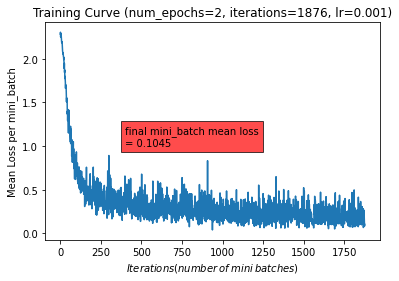

In [ ]:
"""Testing Training function"""
fc_model = FCNet()
# train(fc_model, num_iters=1000)
train_with_epochs(fc_model, num_epochs=2)

# cnn_model = ConvNet()
# train(cnn_model, num_iters=1000)
# train_with_epochs(cnn_model, num_epochs=1)

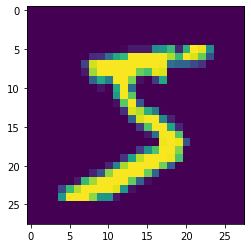

In [ ]:
"""Targetted Adversarial Attack"""
image = mnist_data[0][0]
target_label = 3

model = fc_model

plt.imshow(image[0])

* --------------- ConvNet --------------- *
!!!!! Model needs to be trained first !!!!!
Training Loop Begins ...
	Epoch [1/2]	Iter: [256/938], One mini_batch Mean Loss: 0.3634	One mini_batch Total Loss: 23.2586
	Epoch [1/2]	Iter: [512/938], One mini_batch Mean Loss: 0.1048	One mini_batch Total Loss: 6.7045
	Epoch [1/2]	Iter: [768/938], One mini_batch Mean Loss: 0.1279	One mini_batch Total Loss: 8.1824
	Epoch [1/2]	Total Epoch Mean Loss: 24.3159
 
	Epoch [2/2]	Iter: [1024/1876], One mini_batch Mean Loss: 0.1263	One mini_batch Total Loss: 8.0857
	Epoch [2/2]	Iter: [1280/1876], One mini_batch Mean Loss: 0.0887	One mini_batch Total Loss: 5.6773
	Epoch [2/2]	Iter: [1536/1876], One mini_batch Mean Loss: 0.0245	One mini_batch Total Loss: 1.5673
	Epoch [2/2]	Iter: [1792/1876], One mini_batch Mean Loss: 0.0439	One mini_batch Total Loss: 2.8119
	Epoch [2/2]	Total Epoch Mean Loss: 6.8757
 
* ------------------------------------- *
Training Results...
	Total iterations = # of mini_batches run = 18

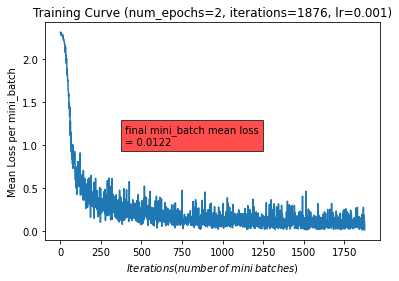

---------- Training complete ----------
Creating adversarial examples ...



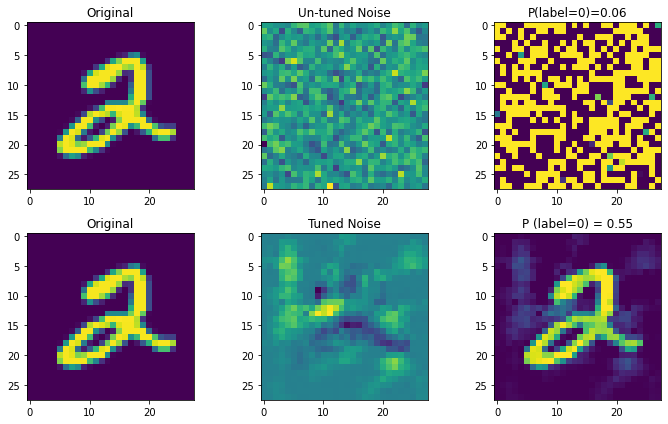

With Un-tuned noise, the model cannot recognize any digits in the original + un-tuned noise image.
With tuned noise, the model thinks the original digit is 0 with P(label=0) = 0.55


In [ ]:

def create_adversarial_example(model, model_trained, image, target_label):

    """
    The model passed in needs to be trained first.
    """
    if not model_trained:
        print("!!!!! Model needs to be trained first !!!!!")

        train_with_epochs(model)
        print("---------- Training complete ----------")

    print("="*80)
    print("Creating adversarial examples ...\n")
    noise = torch.randn(1, 28, 28)
    noise.requires_grad = True

    # Use optimizer to tune the values in noise
    optimizer = optim.Adam([noise], lr=0.01, weight_decay=1)
    criterion = nn.CrossEntropyLoss()

    # Tuning the noise values
    """
    這段loop的目的是把 image + noise 和 target_label "3" 弄得很像.
    弄得很像的方式是透過不斷更新 noise裡的數值來minimize loss(output, target_label)
    最後訓練完的noise 如果加上 image 會讓模型誤以為是 target_label的數值
    例如: 數字5 + noise, 讓模型以為是3.
    這個以為是真的以為是3, 而不是亂猜或猜錯,才猜成3
    """
    for i in range(1000):
        adv_image = torch.clamp(image + noise, 0, 1)
        out = model(adv_image.unsqueeze(0)) # torch.Size([1, 1, 10])
        loss = criterion(out, torch.Tensor([target_label]).long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    # The values in noise has now been tuned to make image+noise look like
    # target_value of 3
    adv_image = torch.clamp(image + noise, 0, 1) # ideally adv_image would look like "3"
    adv_label = torch.argmax(model(adv_image), dim=1).item() # 3 # Find the max. value in dim=1 (this is not the probability)
    adv_percent = torch.softmax(model(adv_image), dim=1)[0, target_label].item() # This is the probability values

    """Image with un-tuned noise"""
    untuned_noise = torch.randn(1, 28, 28) * 20
    untuned_image = torch.clamp(image + untuned_noise, 0, 1)
    untuned_label = torch.argmax(model(untuned_image), dim=1).item()
    untuned_percent = torch.softmax(model(untuned_image), dim=1)[0, target_label].item()

    fig, ax = plt.subplots(2, 3, figsize=(10,6))

    ax[0,0].imshow(image[0])
    ax[0,0].set_title("Original")

    ax[0,1].imshow(untuned_noise[0])
    ax[0,1].set_title("Un-tuned Noise")

    ax[0,2].imshow(untuned_image[0])
    # ax[0,2].set_title("Un-tuned Noise +image")
    ax[0,2].set_title(f"P(label={target_label})={untuned_percent:.2f}")
###
    ax[1,0].imshow(image[0])
    ax[1,0].set_title("Original")

    ax[1,1].imshow(noise[0].detach().numpy()) # noise is a .required_grad = True tensor, so we need detach().numpy()
    # we can still plot this with just .detach() just to remove its requires_grad feature
    ax[1,1].set_title("Tuned Noise")

    ax[1,2].imshow(adv_image.detach().numpy()[0])
    ax[1,2].set_title(f"P (label={target_label}) = {adv_percent:.2f}")
    fig.tight_layout()
    plt.show()
####
    print("="*40)
    print(f'With Un-tuned noise, the model cannot recognize any digits in the original + un-tuned noise image.')
    print("="*40)
    print(f'With tuned noise, the model thinks the original digit is {adv_label} with P(label={adv_label}) = {adv_percent:.2f}')




cnn_model = ConvNet()
# train(cnn_model, num_iters=1500)
create_adversarial_example(model=cnn_model, model_trained=False, image=mnist_data[5][0],target_label=0)

# GAN Simple Example

In [ ]:

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)
np.random.seed(1)

In [ ]:
# Hyper parameters
BATCH_SIZE = 64
LR_G = 1e-4
LR_D = 1e-4
N_IDEAS = 5 # think of this number as number of ideas for generating an artwork
ART_COMPONENT = 15 # total points Generator can draw
PAINT_POINTS = np.vstack([np.linspace(-1,1,ART_COMPONENT) for _ in range(BATCH_SIZE)])

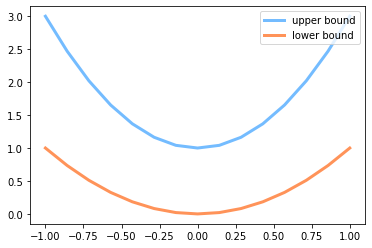

In [ ]:
# show our beautiful painting range
plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
plt.legend(loc='upper right')
plt.show()

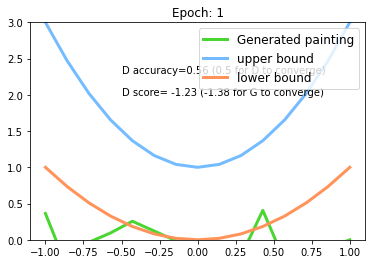

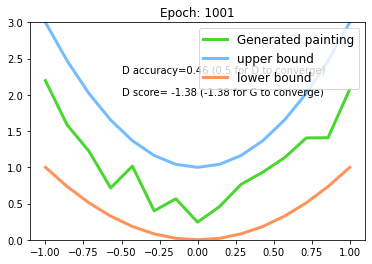

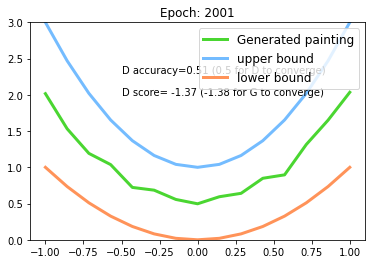

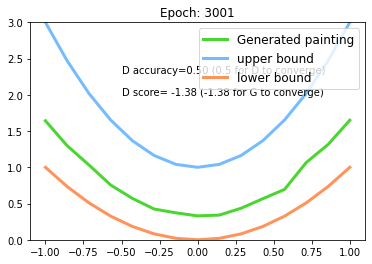

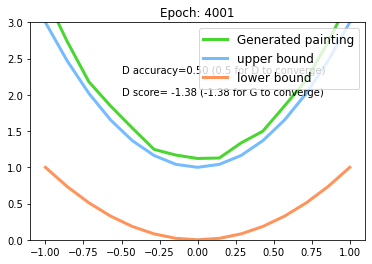

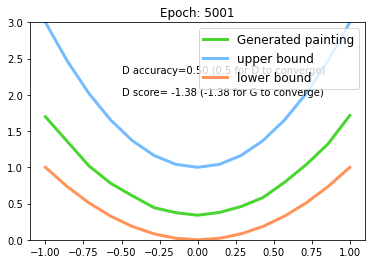

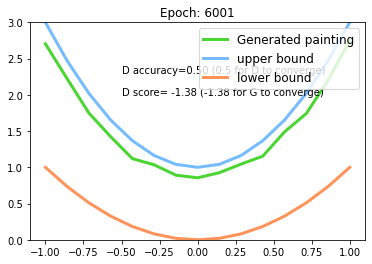

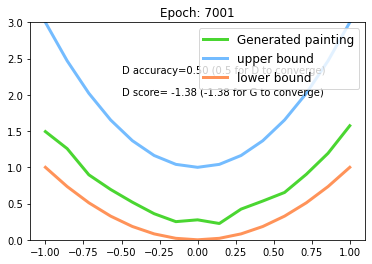

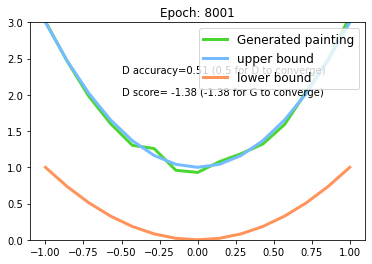

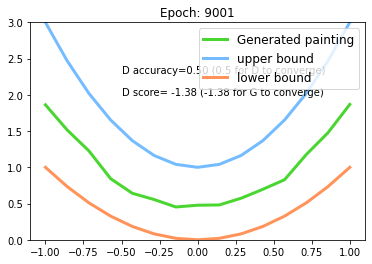

In [ ]:
# painting from the famous artist (real target)
def artist_works():
    a = np.random.uniform(1, 2, size=BATCH_SIZE)[:, np.newaxis]
    paintings = a * np.power(PAINT_POINTS, 2) + (a-1)
    paintings = torch.from_numpy(paintings).float()
    return torch.Tensor(paintings)

# Generator
G = nn.Sequential(
    nn.Linear(N_IDEAS, 128), 
    nn.ReLU(),
    nn.Linear(128, ART_COMPONENT)
)
# Discriminator
D = nn.Sequential(
    nn.Linear(ART_COMPONENT, 128), # receive input either from artist or Generator
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid(), # tell the probability that the art work is made by artist
)


# Optimizers
opt_D = torch.optim.Adam(D.parameters(), lr=LR_D)
opt_G = torch.optim.Adam(G.parameters(), lr=LR_G)


'''Training'''
for step in range(10000):

    artist_painting = artist_works()
    G_ideas = torch.randn(BATCH_SIZE, N_IDEAS, requires_grad=True)
    G_paintings = G(G_ideas) # produce fake paintings from G
    
    prob_artist1 = D(G_paintings) # D try to reduce this prob

    G_loss = torch.mean(torch.log(1. - prob_artist1)) # G try to increase prob_artist1
    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()
    
    prob_artist0 = D(artist_painting) # D try to maximize this prob
    prob_artist1 = D(G_paintings.detach()) # D try to reduce this prob
    D_loss = - torch.mean(torch.log(prob_artist0) + torch.log(1. - prob_artist1))

    opt_D.zero_grad()
    D_loss.backward(retain_graph=True) # reusing computational graph
    opt_D.step()



    if step % 1000 == 0:  # plotting
        plt.cla()
        plt.plot(PAINT_POINTS[0], G_paintings.data.numpy()[0], c='#4AD631', lw=3, label='Generated painting',)
        plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
        plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
        plt.title(f"Epoch: {step+1}")
        plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % prob_artist0.data.numpy().mean(), fontdict={'size': 10})
        plt.text(-.5, 2, 'D score= %.2f (-1.38 for G to converge)' % -D_loss.data.numpy(), fontdict={'size': 10})
        plt.ylim((0, 3));plt.legend(loc='upper right', fontsize=12);plt.draw();plt.pause(0.01)
        plt.show()

# Building A GAN from Scratch

In [ ]:
!pip install pytorch-lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 800 kB 6.6 MB/s 
     |████████████████████████████████| 125 kB 79.4 MB/s 
     |████████████████████████████████| 512 kB 61.5 MB/s 


In [ ]:
import os

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import MNIST

import matplotlib.pyplot as plt

import pytorch_lightning as pl


random_seed = 42
torch.manual_seed(random_seed)

BATCH_SIZE=128
AVAIL_GPUS = min(1, torch.cuda.device_count())
# NUM_WORKERS=int(os.cpu_count() / 2)

In [ ]:
class MNISTDataModule(pl.LightningDataModule):
    def __init__(self, data_dir="./data", 
                 batch_size=BATCH_SIZE, num_workers=2):
        super().__init__()
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.num_workers = num_workers

        self.transform = transforms.Compose(
            [
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,)),
            ]
        )

    def prepare_data(self):
        MNIST(self.data_dir, train=True, download=True)
        MNIST(self.data_dir, train=False, download=True)

    def setup(self, stage=None):
        # Assign train/val datasets
        if stage == "fit" or stage is None:
            mnist_full = MNIST(self.data_dir, train=True, transform=self.transform)
            self.mnist_train, self.mnist_val = random_split(mnist_full, [55000, 5000])

        # Assign test dataset
        if stage == "test" or stage is None:
            self.mnist_test = MNIST(self.data_dir, train=False, transform=self.transform)

    def train_dataloader(self):
        return DataLoader(self.mnist_train, batch_size=self.batch_size, num_workers=self.num_workers)

    def val_dataloader(self):
        return DataLoader(self.mnist_val, batch_size=self.batch_size, num_workers=self.num_workers)

    def test_dataloader(self):
        return DataLoader(self.mnist_test, batch_size=self.batch_size, num_workers=self.num_workers)

In [ ]:
# Detective: fake or no fake -> 1 output [0, 1]
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        # Simple CNN
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 1)
  
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        # Flatten the tensor so it can be fed into the FC layers
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return torch.sigmoid(x)

# Generate Fake Data: output like real data [1, 28, 28] and values -1, 1
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.lin1 = nn.Linear(latent_dim, 7*7*64)  # [n, 256, 7, 7]
        self.ct1 = nn.ConvTranspose2d(64, 32, 4, stride=2) # [n, 64, 16, 16]
        self.ct2 = nn.ConvTranspose2d(32, 16, 4, stride=2) # [n, 16, 34, 34]
        self.conv = nn.Conv2d(16, 1, kernel_size=7)  # [n, 1, 28, 28]
    
    def forward(self, x):
        # Pass latent space input into linear layer and reshape
        x = self.lin1(x)
        x = F.relu(x)
        x = x.view(-1, 64, 7, 7)  #256
        
        # Upsample (transposed conv) 16x16 (64 feature maps)
        x = self.ct1(x)
        x = F.relu(x)
        
        # Upsample to 34x34 (16 feature maps)
        x = self.ct2(x)
        x = F.relu(x)
        
        # Convolution to 28x28 (1 feature map)
        return self.conv(x)

In [ ]:
"""GAN"""
class GAN(pl.LightningModule):
    def __init__(self, latent_dim=100, lr=1e-4):
        super().__init__()
        self.save_hyperparameters()

        self.generator = Generator(latent_dim=self.hparams.latent_dim)
        self.discriminator = Discriminator()

        # random noise
        self.validation_z = torch.randn(6, self.hparams.latent_dim)
    
    def forward(self, z):
        return self.generator(z)
    
    def adversarial_loss(self, y_hat, y):
        return F.binary_cross_entropy(y_hat, y)
    
    def training_step(self, batch, batch_idx, optimizer_idx):
        real_imgs, _ = batch

        # sample noise
        z = torch.randn(real_imgs.shape[0], self.hparams.latent_dim)
        z = z.type_as(real_imgs)

        # train Generator: max log(D(G(z)))
        if optimizer_idx == 0:
            fake_imgs = self(z)
            y_hat = self.discriminator(fake_imgs)

            y = torch.ones(real_imgs.size(0), 1)
            y = y.type_as(real_imgs)

            g_loss = self.adversarial_loss(y_hat, y)

            log_dict = {"g_loss": g_loss}
            return {"loss": g_loss, "progess_bar": log_dict, "log":log_dict}
        
        # train Discriminator: max[log(D(x)) + log(1-D(G(z)))] 
        if optimizer_idx == 1:
            # how well can it label as real
            y_hat_real = self.discriminator(real_imgs)

            y_real = torch.ones(real_imgs.size(0), 1)
            y_real = y_real.type_as(real_imgs)

            real_loss = self.adversarial_loss(y_hat_real, y_real)

            # how well can it label as fake
            y_hat_fake = self.discriminator(self(z).detach())

            y_fake = torch.zeros(real_imgs.size(0), 1)
            y_fake = y_fake.type_as(real_imgs)

            fake_loss = self.adversarial_loss(y_hat_fake, y_fake)

            d_loss = (real_loss + fake_loss) / 2

            log_dict = {"d_loss": d_loss}
            return {"loss": d_loss, "progess_bar": log_dict, "log":log_dict}
        
    def configure_optimizers(self):
        lr = self.hparams.lr
        opt_g = torch.optim.Adam(self.generator.parameters(), lr=lr)
        opt_d = torch.optim.Adam(self.discriminator.parameters(), lr=lr)
        return [opt_g, opt_d], []
    
    def plot_imgs(self):
        z = self.validation_z.type_as(self.generator.lin1.weight)
        sample_imgs = self(z) # same as forward(z)

        print("epoch", self.current_epoch)
        fig = plt.figure()
        for i in range(sample_imgs.size(0)):
            plt.subplot(2, 3, i+1)
            plt.tight_layout()
            plt.imshow(sample_imgs.detach()[i, 0, :, :], cmap='gray', interpolation='none')
            plt.title("Generated Data")
            plt.xticks([])
            plt.yticks([])
            plt.axis('off')
        plt.show()

    def on_train_epoch_end(self):
        self.plot_imgs()



In [ ]:
dm = MNISTDataModule()
model = GAN()

epoch 0


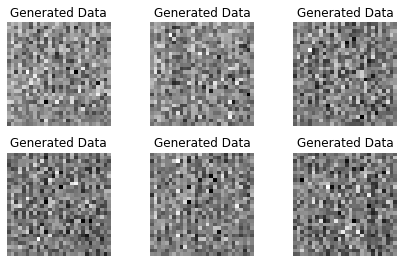

In [ ]:
model.plot_imgs()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params
------------------------------------------------
0 | generator     | Generator     | 358 K 
1 | discriminator | Discriminator | 21.4 K
------------------------------------------------
379 K     Trainable params
0         Non-trainable params
379 K     Total params
1.520     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

epoch 0


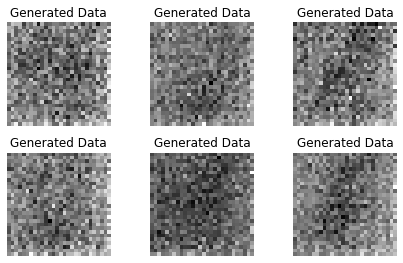

epoch 1


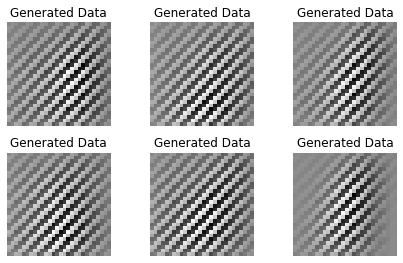

epoch 2


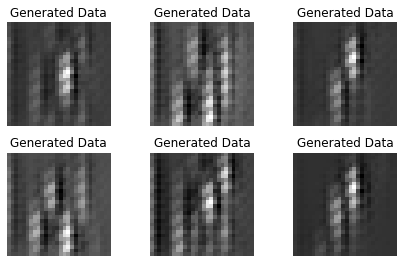

epoch 3


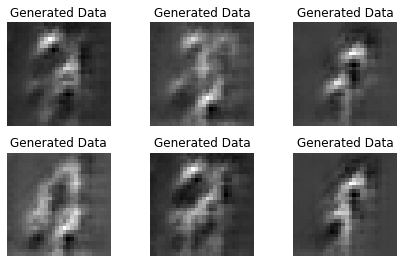

epoch 4


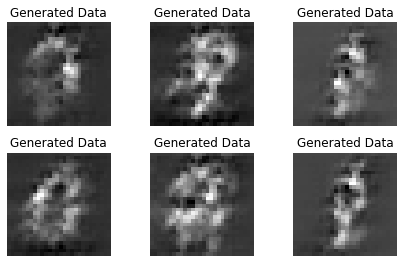

epoch 5


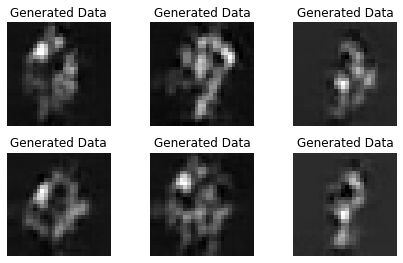

epoch 6


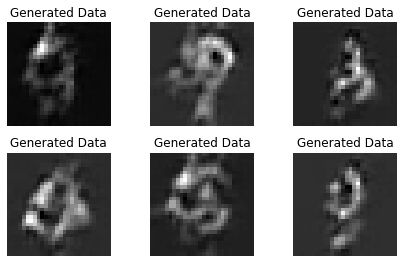

epoch 7


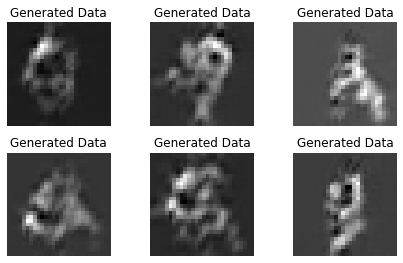

epoch 8


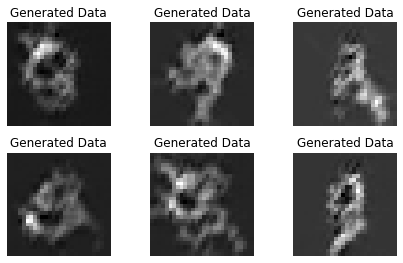

epoch 9


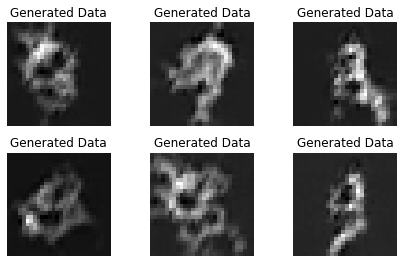

epoch 10


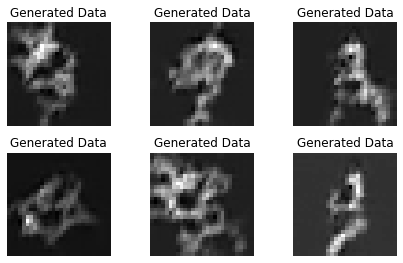

epoch 11


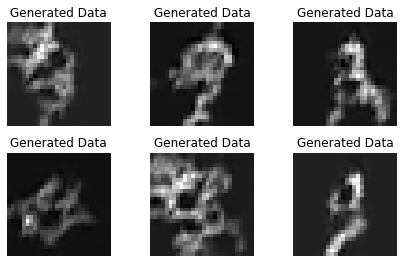

epoch 12


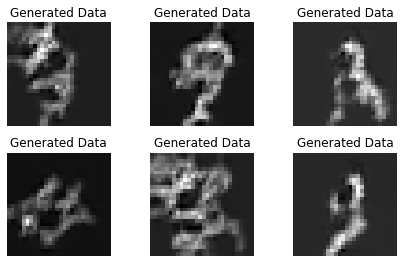

epoch 13


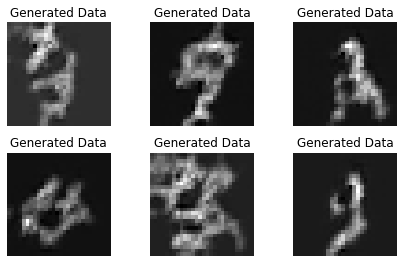

epoch 14


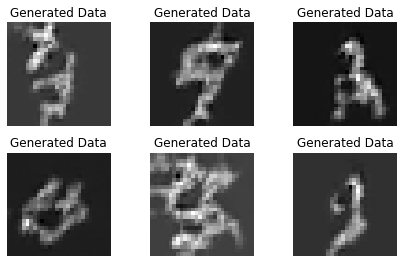

epoch 15


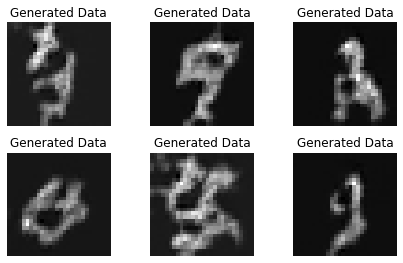

epoch 16


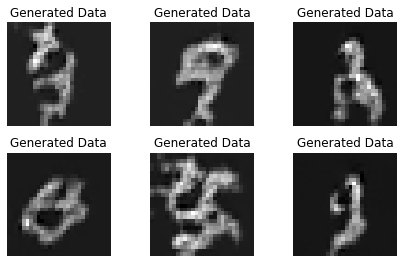

epoch 17


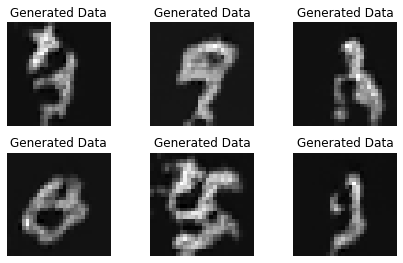

epoch 18


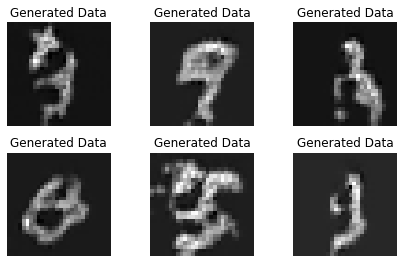

epoch 19


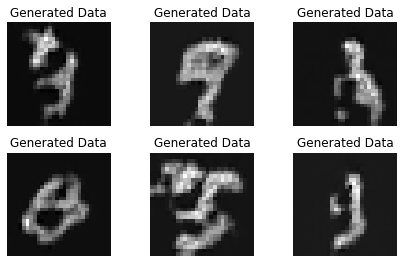

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


In [ ]:
trainer = pl.Trainer(max_epochs=20)
trainer.fit(model, dm)

# GAN example (Fashion MNIST)
https://www.youtube.com/watch?v=iyUv7QyMAIw

https://www.kaggle.com/code/tauilabdelilah/generate-fashion-minist-with-simple-gan

In [ ]:
import numpy as np
import torch
from torch import nn, optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
LR = 1e-4
Z_DIM = 64
IMG_DIM = 28*28*1 # 728
BATCH_SIZE = 64
EPOCHS = 100

In [ ]:
# Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_features):
        super().__init__()
        self.disc = nn.Sequential(
            nn.Linear(in_features=input_features,
                out_features=256),
            nn.LeakyReLU(0.1),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.1),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.disc(x)

# Generator
class Generator(nn.Module):
    def __init__(self, img_dim, z_dim):
        super().__init__()
        self.gen = nn.Sequential(
            nn.Linear(in_features=z_dim,
                out_features=256),
            nn.LeakyReLU(0.1),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.1),
            nn.Linear(512, img_dim),
            nn.Tanh() # [-1,1]
        )
    
    def forward(self, x):
        return self.gen(x)

In [ ]:
disc = Discriminator(input_features=IMG_DIM).to(DEVICE)
gen = Generator(img_dim=IMG_DIM, z_dim=Z_DIM).to(DEVICE)

fix_noise = torch.randn(BATCH_SIZE, Z_DIM).to(DEVICE)

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])

dataset = torchvision.datasets.FashionMNIST(root='./dataset', train=True, transform=transform, download=True)
loader = DataLoader(dataset=dataset, batch_size=BATCH_SIZE, shuffle=True)


# optimizers
opt_disc = torch.optim.Adam(disc.parameters(), lr=LR)
opt_gen = torch.optim.Adam(disc.parameters(), lr=LR)

# loss fn
loss = nn.BCELoss()

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./dataset/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/FashionMNIST/raw



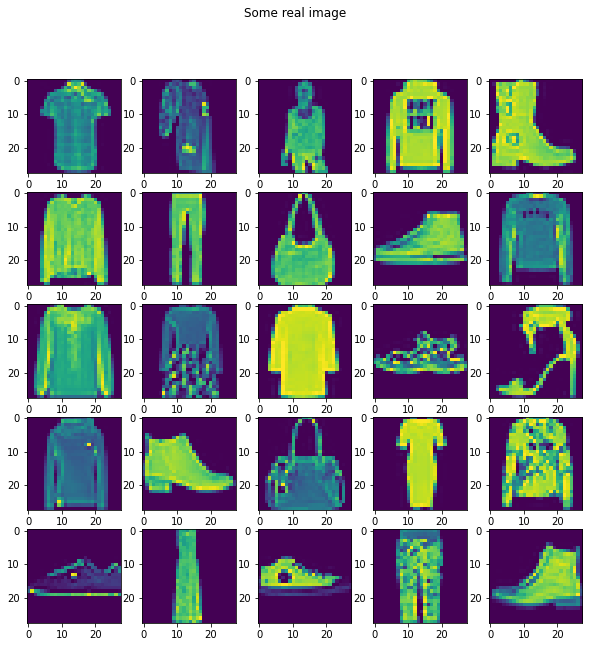

In [ ]:
real, _ = next(iter(loader))
_, ax = plt.subplots(5, 5, figsize=(10, 10))
plt.suptitle("Some real image")

ind = 0
for k in range(5):
    for kk in range(5):
        ind +=1
        ax[k][kk].imshow(real[ind][0]) 


Epoch: 0/100, Loss_D : 0.3323, Loss_G : 0.7242
Epoch: 1/100, Loss_D : 0.3331, Loss_G : 0.7219
Epoch: 2/100, Loss_D : 0.3334, Loss_G : 0.7212
Epoch: 3/100, Loss_D : 0.3337, Loss_G : 0.7205
Epoch: 4/100, Loss_D : 0.3338, Loss_G : 0.7203
Epoch: 5/100, Loss_D : 0.3337, Loss_G : 0.7204
Epoch: 6/100, Loss_D : 0.3336, Loss_G : 0.7206
Epoch: 7/100, Loss_D : 0.3336, Loss_G : 0.7206
Epoch: 8/100, Loss_D : 0.3339, Loss_G : 0.7199
Epoch: 9/100, Loss_D : 0.3342, Loss_G : 0.7194
Epoch: 10/100, Loss_D : 0.3340, Loss_G : 0.7198
Epoch: 11/100, Loss_D : 0.3330, Loss_G : 0.7218
Epoch: 12/100, Loss_D : 0.3329, Loss_G : 0.7220
Epoch: 13/100, Loss_D : 0.3328, Loss_G : 0.7223
Epoch: 14/100, Loss_D : 0.3331, Loss_G : 0.7215
Epoch: 15/100, Loss_D : 0.3331, Loss_G : 0.7215
Epoch: 16/100, Loss_D : 0.3330, Loss_G : 0.7216
Epoch: 17/100, Loss_D : 0.3331, Loss_G : 0.7215
Epoch: 18/100, Loss_D : 0.3328, Loss_G : 0.7221
Epoch: 19/100, Loss_D : 0.3330, Loss_G : 0.7218
Epoch: 20/100, Loss_D : 0.3331, Loss_G : 0.7216
Ep

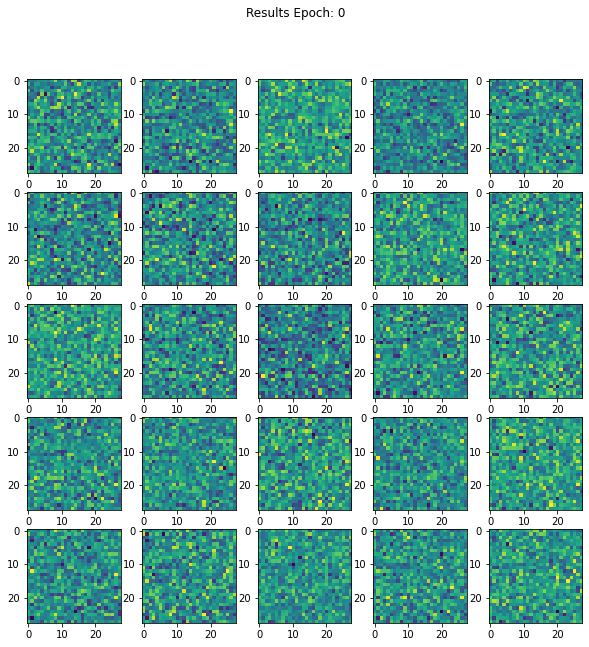

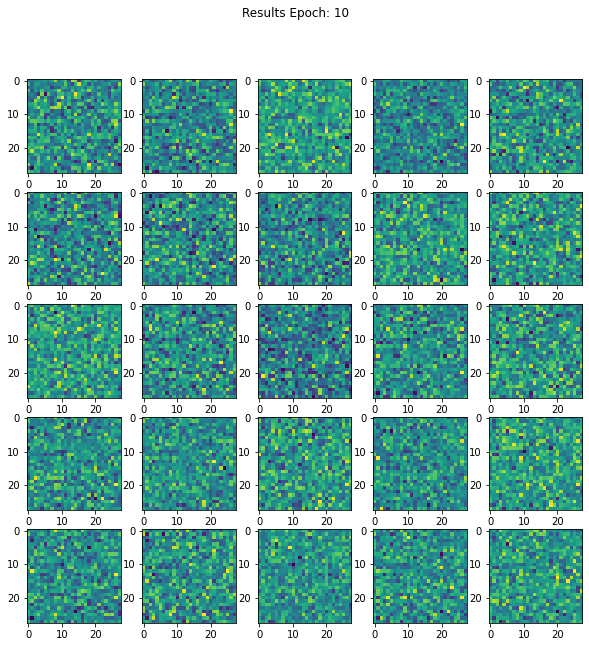

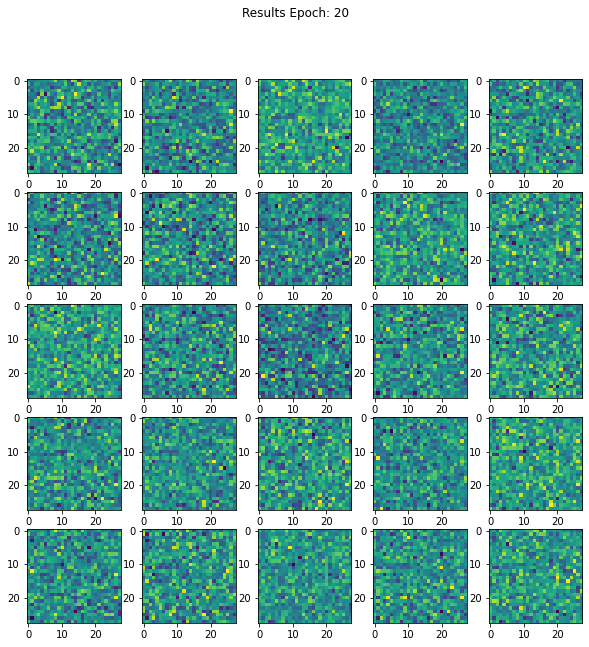

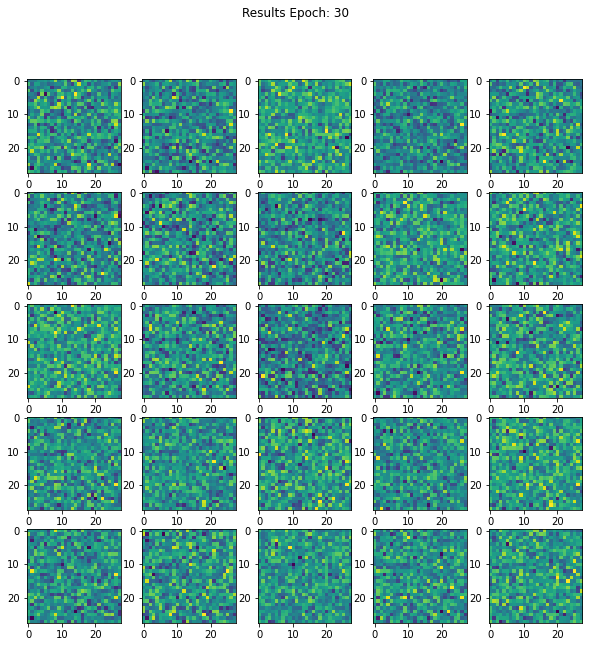

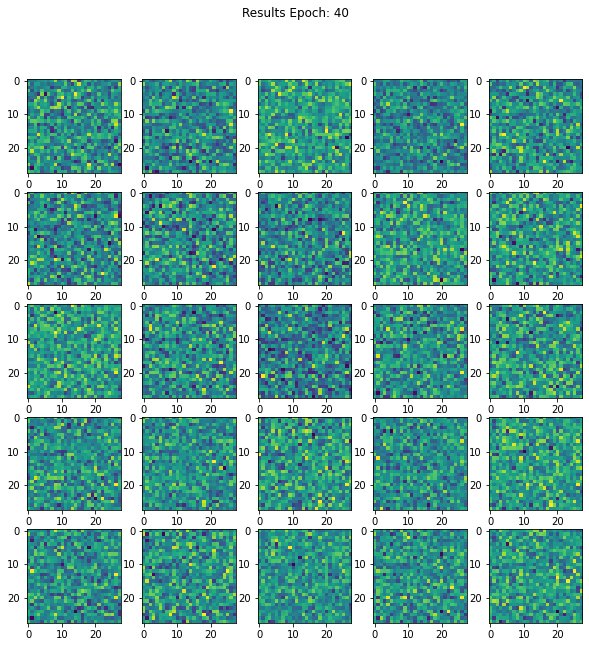

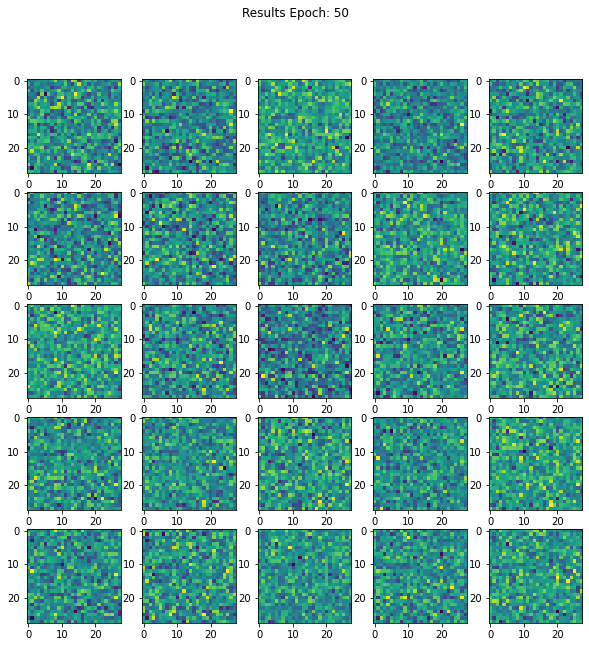

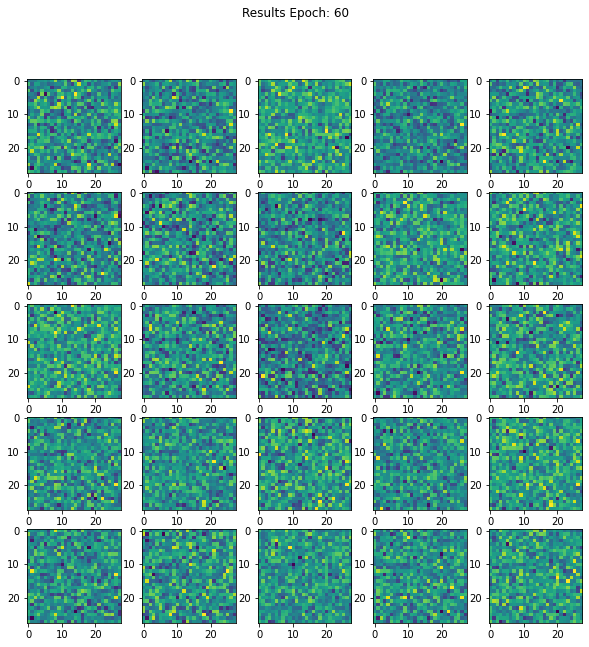

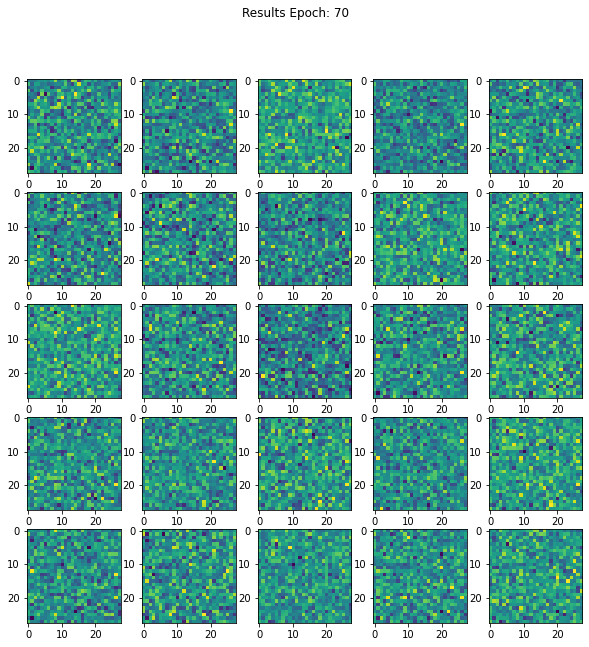

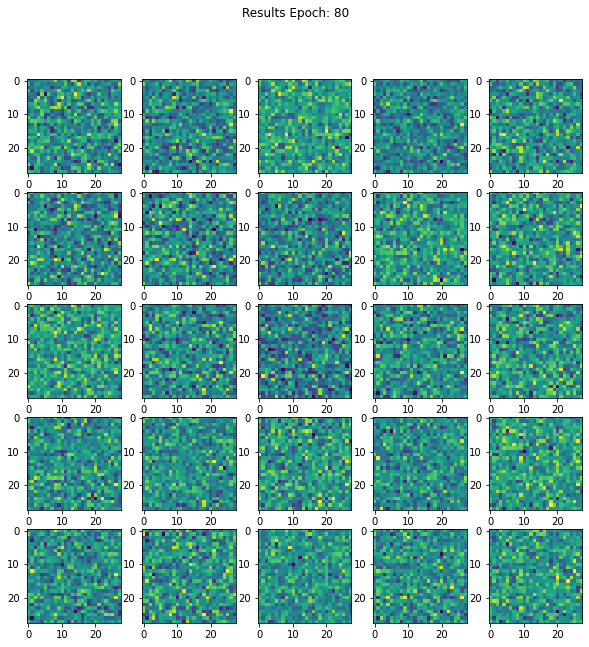

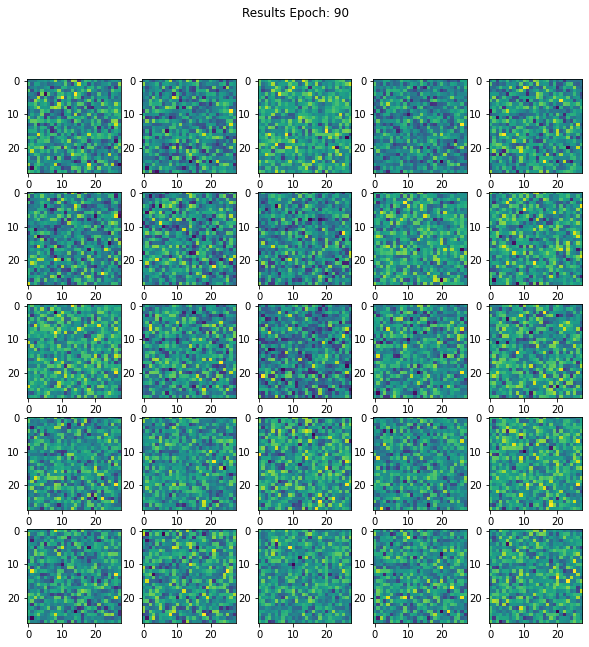

In [ ]:
for epoch in range(EPOCHS):
    for batch_idx, (real, _) in enumerate(loader):

        ### real image
        real = real.view(-1, 784).to(DEVICE) # (64, 1, 28, 28) -> (64, 784)
        batch_size = real.shape[0]       # batch_size = 64 from above real.shape[0] 

        ######## TRAIN Discriminator: max log(D(real)) + log(1-D(G(z)))
        noise = torch.randn(batch_size, Z_DIM).to(DEVICE) # noise
        fake = gen(noise) # fake_img


        disc_real = disc(real).view(-1) # [bs, 1] -> [bs] # D(x)
        disc_fake = disc(fake).view(-1) # D(G(z))

        ##### 對真圖片打上真標記, 假圖片打上假標記
        ##### 讓鑑別器學習分辨真/假
        lossD_real = loss(disc_real, torch.ones_like(disc_real)) # log(D(x))
        lossD_fake = loss(disc_fake, torch.zeros_like(disc_fake)) # log(1-D(G(z)))
        loss_D = (lossD_real + lossD_fake) / 2 # log(D(x)) + log(1-D(G(z))) local_min = 1/2


        disc.zero_grad() # OR opt_disc.zero_grad()
        loss_D.backward(retain_graph=True) ### very important to have "retain_graph=True"
                            ### Generator needs this computation graph to do backpropagation
        opt_disc.step()

        ######## TRAIN Generator: min log(1-D(G(z))) <==> max log(D(G(z)))
        output = disc(fake).view(-1)
        ##### 把假圖片打上真圖片的標記
        ##### 實則在計算和minimize假圖片和真標籤的loss, 讓假圖片越來越真
        lossG = loss(output, torch.ones_like(output)) # max.(log(D(G(z))))

        gen.zero_grad()
        lossG.backward()
        opt_gen.step()

    '''End of one epoch'''
    print(f'Epoch: {epoch}/{EPOCHS}, Loss_D : {loss_D:.4f}, Loss_G : {lossG:.4f}')

    if epoch % 10 == 0:
        with torch.no_grad():
            fake = gen(fix_noise).reshape(-1, 1, 28, 28).to('cpu') # 728 -> 1, 28, 28
        
        _,ax = plt.subplots(5, 5, figsize=(10,10))
        plt.suptitle("Results Epoch: "+str(epoch))

        ind = 0
        for k in range(5):
            for kk in range(5):
                ind += 1
                ax[k][kk].imshow(fake[ind][0])


# GAN Example (MNIST)
https://www.cs.toronto.edu/~lczhang/aps360_20191/lec/w10/gan.html

https://www.cs.toronto.edu/~lczhang/321/lec/gan_notes.html#Generative-Adversarial-Network

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
from torchvision import datasets, transforms

mnist_data = datasets.MNIST(root="./data",
                train=True,
                download=True,
                transform=transforms.ToTensor())


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 300),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(300, 100),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(100,1)
        )
    def forward(self, x):
        x = x.view(x.size(0),-1)
        x = self.model(x)
        return x.view(x.size(0))

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 300),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(300, 28*28),
            nn.Sigmoid()
        )
    def forward(self, x):
        out = self.model(x).view(x.size(0), 1, 28, 28)
        return out



Epoch [1/10], d_loss: 0.5565180778503418, g_loss: 0.4112641215324402,D(x): 0.0001520312944194302, D(G(z)): 0.3287084698677063


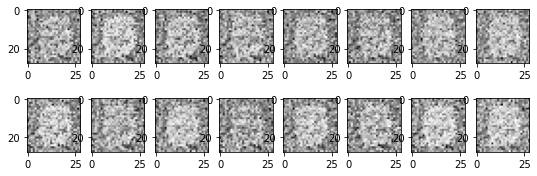

Epoch [2/10], d_loss: 0.5531033873558044, g_loss: 0.4158502519130707,D(x): 1.6638534361845814e-05, D(G(z)): 0.3308626115322113


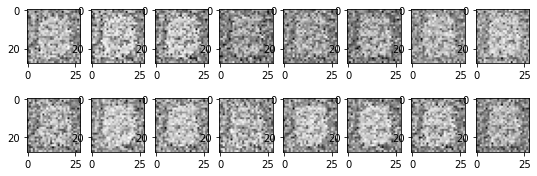

Epoch [3/10], d_loss: 0.5410290360450745, g_loss: 0.41388070583343506,D(x): 2.212512117694132e-05, D(G(z)): 0.3389701545238495


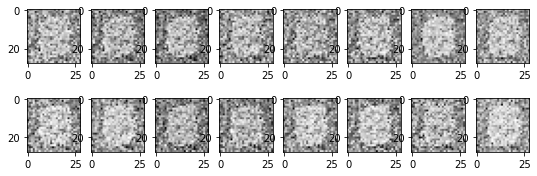

Epoch [4/10], d_loss: 0.5459645986557007, g_loss: 0.4205261170864105,D(x): 3.5906126868212596e-05, D(G(z)): 0.33563271164894104


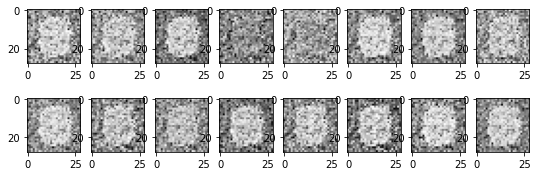

Epoch [5/10], d_loss: 0.5450718402862549, g_loss: 0.4031372368335724,D(x): 5.1294486183905974e-05, D(G(z)): 0.33622196316719055


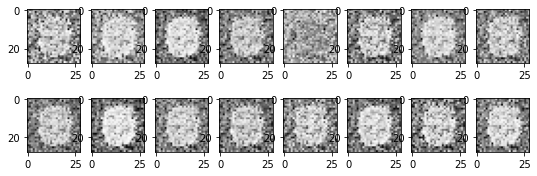

Epoch [6/10], d_loss: 0.5500571727752686, g_loss: 0.40430277585983276,D(x): 2.6476362108951434e-05, D(G(z)): 0.33288466930389404


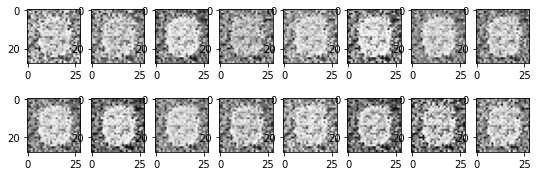

Epoch [7/10], d_loss: 0.5556340217590332, g_loss: 0.40153971314430237,D(x): 1.610598701518029e-05, D(G(z)): 0.3292277157306671


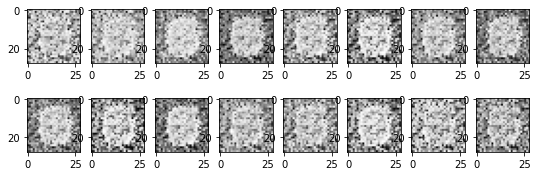

Epoch [8/10], d_loss: 0.5317157506942749, g_loss: 0.418009877204895,D(x): 4.131044079258572e-06, D(G(z)): 0.34532126784324646


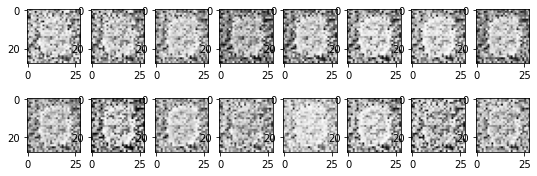

Epoch [9/10], d_loss: 0.5577917098999023, g_loss: 0.3938877582550049,D(x): 9.208097253576852e-06, D(G(z)): 0.32778871059417725


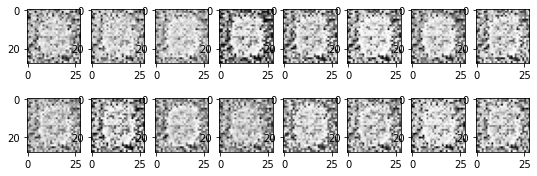

Epoch [10/10], d_loss: 0.5517777800559998, g_loss: 0.40815991163253784,D(x): 4.0555925806984305e-05, D(G(z)): 0.33176153898239136


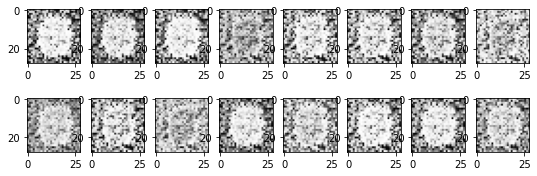

In [ ]:
"""Training"""
def train(generator, discriminator, lr=1e-3, num_epochs=5):
    
    criterion = nn.BCEWithLogitsLoss()

    d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=lr)
    g_optimizer = torch.optim.Adam(generator.parameters(), lr=lr)

    train_loader = torch.utils.data.DataLoader(mnist_data, batch_size=100, shuffle=True)

    num_test_samples = 16
    test_noise = torch.randn(num_test_samples, 100)

    for epoch in range(num_epochs):
        # label that we are using both models
        generator.train()
        discriminator.train()

        for n, (images,_) in enumerate(train_loader):
            " === Train the Discriminator ==="

            noise = torch.randn(images.size(0), 100)
            fake_images = generator(noise)
            ##### stack images on top of fake_images
            inputs = torch.cat([images, fake_images])

            ##### stack real (0) on top of fake (1)
            ##### using 0 for real, 1 for fake
            labels = torch.cat([torch.zeros(images.size(0)), # label real
                        torch.ones(images.size(0))]) # label fake
            
            
            d_outputs = discriminator(inputs) ### result from discriminator

            ##### 讓鑑別器學習真/偽圖片
            ##### 給真圖片打上真標籤(0), 假圖片打上fake標籤(1)
            ##### 讓鑑別器學習縮小真圖片和真標籤的loss,
            ##### 縮小假圖片和fake標籤的loss,
            ##### 進而讓鑑別器更能分辨真偽
            d_loss = criterion(d_outputs, labels) 
            d_loss.backward(retain_graph=True) # 需要保留計算圖, 因為下面的生成器會需要這個graph來backpropagation
            d_optimizer.step()
            d_optimizer.zero_grad()

            " === Train the Generator ==="    
            noise = torch.randn(images.size(0), 100)
            fake_images = generator(noise)
            outputs = discriminator(fake_images)

            g_loss = criterion(outputs, torch.zeros(images.size(0)))
            g_loss.backward()
            g_optimizer.step()
            g_optimizer.zero_grad()

        """All Data has been seen. One Epoch has Ended"""
        scores = torch.sigmoid(d_outputs)
        real_score = scores[:images.size(0)].data.mean()
        fake_score = scores[images.size(0):].data.mean()

        print(f'Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item()}, g_loss: {g_loss.item()},'
            f'D(x): {real_score}, D(G(z)): {fake_score}')
        
        # plot images
        generator.eval()
        discriminator.eval()
        test_images = generator(test_noise)
        plt.figure(figsize=(9, 3))
        for k in range(16):
            plt.subplot(2, 8, k+1)
            plt.imshow(test_images[k, :].data.numpy().reshape(28,28), cmap='Greys')
        
        plt.show()



discriminator = Discriminator()
generator = Generator()
train(generator, discriminator, lr=0.001, num_epochs=10)

# DCGAN (pytorch.org)
https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

Refer to Kaggle
https://www.kaggle.com/benintw/dcgan-celeba/edit

### Important Notes:
The DCGAN paper mentions it is a good practice to use strided convolution rather than pooling to downsample because it lets the network learn its own pooling function.

Also batch norm and leaky relu functions promote healthy gradient flow which is critical for the learning process of both 
G and D.

# DCGAN - Implementing 

- https://www.youtube.com/watch?v=IZtv9s_Wx9I&list=PLlH2Slx5aqYgFTM8rJZ1PsTKSAMcPWNbB&index=6&t=22s

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter


In [ ]:


class Discriminator(nn.Module):
    def __init__(self, channels_img, features_d):
        super(Discriminator, self).__init__()
        # input: N x channels_img x 64 x 64
        self.disc = nn.Sequential(
            nn.Conv2d(
                channels_img,
                features_d,
                kernel_size=4,
                stride=2,
                padding=1
            ),
            nn.LeakyReLU(0.2),
            self._block(features_d, features_d*2, kernel_size=4, stride=2, padding=1), # 16 x 16
            self._block(features_d*2, features_d*4, kernel_size=4, stride=2, padding=1), # 8 x 8 
            self._block(features_d*4, features_d*8, kernel_size=4, stride=2, padding=1), # 4x4
            nn.Conv2d(features_d*8, 1, kernel_size=4, stride=2, padding=0), # 1x1
            nn.Sigmoid(),
        )

    def _block(self, in_channels, out_channels, kernel_size, stride, padding):
        return nn.Sequential(
            nn.Conv2d(
                in_channels,
                out_channels,
                kernel_size,
                stride,
                padding,
                bias=False,
            ),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(0.2)
        )
    def forward(self, x):
        return self.disc(x)


class Generator(nn.Module):
    def __init__(self, z_dim, channels_img, features_g):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            # input: N x z_dim x 1 x 1
            self._block(z_dim, features_g*16, 4, 1, 0), # N x f_g * 16 x 4 x 4
            self._block(features_g * 16, features_g*8, 4, 2, 1), # 8x8
            self._block(features_g * 8, features_g * 4, 4, 2, 1), #16x16
            self._block(features_g * 4, features_g * 2, 4, 2, 1), #32x32
            nn.ConvTranspose2d(
                features_g * 2, 
                channels_img,
                kernel_size=4,
                stride=2,
                padding=1,
            ), # 64x64
            nn.Tanh(), #[-1, 1]
        )
    
    def _block(self, in_channels, out_channels, kernel_size, stride, padding):
        return nn.Sequential(
            nn.ConvTranspose2d(
                in_channels,
                out_channels,
                kernel_size,
                stride,
                padding,
                bias=False,
            ),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )
    
    def forward(self, x):
        return self.gen(x)


def initialize_weights(model):
    for m in model.modules():
        if isinstance(m, (nn.Conv2d, nn.ConvTranspose2d, nn.BatchNorm2d)):
            nn.init.normal_(m.weight.data, 0.0, 0.02)

def test():
    N, in_channels, H, W = 8, 3, 64, 64
    z_dim = 100
    x = torch.randn((N, in_channels, H, W))
    
    disc = Discriminator(in_channels, 8)
    initialize_weights(disc)
    
    assert disc(x).shape == (N, 1, 1, 1)
    gen = Generator(z_dim, in_channels, 8)
    initialize_weights(gen)
    z = torch.randn((N, z_dim, 1, 1))

    assert gen(z).shape == (N, in_channels, H, W)
    print("Success")


test()

Success


In [ ]:
# from model import Discriminator, Generator, initialize_weights

In [ ]:
"""Hyper params"""
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
LEARNING_RATE = 2e-4
BATCH_SIZE = 128
IMAGE_SIZE = 64
CHANNELS_IMG = 1
Z_DIM = 100
NUM_EPOCHS = 5
FEATURES_DISC = 64
FEATURES_GEN = 64


transforms = transforms.Compose(
    [
        transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(
            [0.5 for _ in range(CHANNELS_IMG)], [0.5 for _ in range(CHANNELS_IMG)]        )
    ]
)

dataset = datasets.MNIST(root='dataset/', train=True,
                transform=transforms, download=True)


In [ ]:
loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

gen = Generator(Z_DIM, CHANNELS_IMG, FEATURES_GEN).to(device)
disc = Discriminator(CHANNELS_IMG, FEATURES_DISC).to(device)
initialize_weights(gen)
initialize_weights(disc)


In [ ]:
opt_gen = optim.Adam(gen.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))
opt_disc = optim.Adam(disc.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))

criterion = nn.BCELoss()

fixed_noise = torch.randn(32, Z_DIM, 1, 1).to(device)
writer_real = SummaryWriter(f'logs/real')
writer_fake = SummaryWriter(f'logs/fake')
step = 0

gen.train()
disc.train()

for epoch in range(NUM_EPOCHS):
    for batch_idx, (real,_) in enumerate(loader):
        real = real.to(device)
        noise = torch.randn((BATCH_SIZE, Z_DIM, 1, 1)).to(device)
        fake = gen(noise)
        
        ### Train Disc: max log(D(x)) + log(1-D(G(z)))
        disc_real = disc(real).reshape(-1) # N
        loss_disc_real = criterion(disc_real, torch.ones_like(disc_real))
        disc_fake = disc(fake).reshape(-1) # N
        loss_disc_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
        loss_disc = (loss_disc_real + loss_disc_fake) / 2
        disc.zero_grad()
        loss_disc.backward(retain_graph=True)
        opt_disc.step()

        ### Train Gen: min log(1-D(G(z))) <--> max log(D(G(z)))
        output = disc(fake).reshape(-1)
        loss_gen = criterion(output, torch.ones_like(output))
        gen.zero_grad()
        loss_gen.backward()
        opt_gen.step()

        ### print losses occasionally and print to tensorboard
        if batch_idx % 100 == 0:

            with torch.no_grad():
                fake = gen(fixed_noise)
                img_grid_real = torchvision.utils.make_grid(
                    real[:32], normalize=True
                )
                img_grid_fake = torchvision.utils.make_grid(
                    fake[:32], normalize=True
                )

                writer_real.add_image("Real", img_grid_real, global_step=step)
                writer_real.add_image("Fake", img_grid_fake, global_step=step)
            
            step +=1
        



KeyboardInterrupt: ignored